In [6]:
using Distances

In [52]:
include("MC.jl");

In [2]:
include("viz.jl");

In [4]:
ENV["COLUMNS"] = 200;
const N = 30;

In [6]:
fn_berlin = "irradiation_Berlin.nc"
fn_berlin_w  = "irradiation_Berlin_W.nc";

include time stamp:

In [38]:
cols = [:yr, :mo, :d, :hr, :mins, :ghi, :ghiCS]
vars = ["ut_year", "ut_month", "ut_day", "ut_hour", "ut_minute", "GHI", "CLEAR_SKY_GHI"];
dateDic = Dict(zip(cols, vars))

fn1 = joinpath("data", fn_berlin)
for (c, v) in dateDic
    @eval $c = getNCvar(fn1, $v)
end

df = DataFrame(:year=>yr, :month=>mo, :day=>d, :hour=>hr, :minute=>mins)
dt = map(df -> DateTime(df.year, df.month, df.day, df.hour, df.minute), eachrow(df))
df1 = DataFrame(:time=>dt, :month=>mo, :ghi=>ghi, :ghiCS=>ghiCS)

df1_train = df1[1:523007, :]

523007×4 DataFrame
    Row │ time                 month  ghi      ghiCS   
        │ DateTime             Int8   Float64  Float64 
────────┼──────────────────────────────────────────────
      1 │ 2004-02-01T00:15:00      2      0.0      0.0
      2 │ 2004-02-01T00:30:00      2      0.0      0.0
      3 │ 2004-02-01T00:45:00      2      0.0      0.0
      4 │ 2004-02-01T01:00:00      2      0.0      0.0
      5 │ 2004-02-01T01:15:00      2      0.0      0.0
      6 │ 2004-02-01T01:30:00      2      0.0      0.0
      7 │ 2004-02-01T01:45:00      2      0.0      0.0
      8 │ 2004-02-01T02:00:00      2      0.0      0.0
      9 │ 2004-02-01T02:15:00      2      0.0      0.0
     10 │ 2004-02-01T02:30:00      2      0.0      0.0
     11 │ 2004-02-01T02:45:00      2      0.0      0.0
   ⋮    │          ⋮             ⋮       ⋮        ⋮
 522998 │ 2018-12-31T21:30:00     12      0.0      0.0
 522999 │ 2018-12-31T21:45:00     12      0.0      0.0
 523000 │ 2018-12-31T22:00:00     12      0.0      0.0
 523001 │ 2018-12-31T22:15:00     12      0.0      0.0
 523002 │ 2018-12-31T22:30:00     12      0.0      0.0
 523003 │ 2018-12-31T22:45:00     12      0.0      0.0
 523004 │ 2018-12-31T23:00:00     12      0.0      0.0
 523005 │ 2018-12-31T23:15:00     12      0.0      0.0
 523006 │ 2018-12-31T23:30:00     12      0.0      0.0
 523007 │ 2018-12-31T23:45:00     12      0.0      0.0
                                    522986 rows omitted

In [39]:
df1_test = df1[523008:end, :]

35041×4 DataFrame
   Row │ time                 month  ghi      ghiCS   
       │ DateTime             Int8   Float64  Float64 
───────┼──────────────────────────────────────────────
     1 │ 2019-01-01T00:00:00      1      0.0      0.0
     2 │ 2019-01-01T00:15:00      1      0.0      0.0
     3 │ 2019-01-01T00:30:00      1      0.0      0.0
     4 │ 2019-01-01T00:45:00      1      0.0      0.0
     5 │ 2019-01-01T01:00:00      1      0.0      0.0
     6 │ 2019-01-01T01:15:00      1      0.0      0.0
     7 │ 2019-01-01T01:30:00      1      0.0      0.0
     8 │ 2019-01-01T01:45:00      1      0.0      0.0
     9 │ 2019-01-01T02:00:00      1      0.0      0.0
    10 │ 2019-01-01T02:15:00      1      0.0      0.0
    11 │ 2019-01-01T02:30:00      1      0.0      0.0
   ⋮   │          ⋮             ⋮       ⋮        ⋮
 35032 │ 2019-12-31T21:45:00     12      0.0      0.0
 35033 │ 2019-12-31T22:00:00     12      0.0      0.0
 35034 │ 2019-12-31T22:15:00     12      0.0      0.0
 35035 │ 2019-12-31T22:30:00     12      0.0      0.0
 35036 │ 2019-12-31T22:45:00     12      0.0      0.0
 35037 │ 2019-12-31T23:00:00     12      0.0      0.0
 35038 │ 2019-12-31T23:15:00     12      0.0      0.0
 35039 │ 2019-12-31T23:30:00     12      0.0      0.0
 35040 │ 2019-12-31T23:45:00     12      0.0      0.0
 35041 │ 2020-01-01T00:00:00      1      0.0      0.0
                                    35020 rows omitted

In [9]:
df2_train = calCMF(df1_train)
data_train = df2_train.cmf
# df2_test = calCMF(df1_test)
# cmf_test = df2_test.cmf;
# data_train, data_test = cmf_train, cmf_test;

data_train_cls, binStarts, binMean = getBins(data_train, N); # city-specific
# data_test_cls = classify(data_test, binStarts);

In [10]:
ticks = rd.(binMean, 2)
xti = (binMean[[1:2:26; 30]], ticks[[1:2:26; 30]]);

In [11]:
test = getCMF0(fn_berlin; raw=1)[2];
test_neib_w = getCMF0(fn_berlin_w; raw=1)[2];

In [45]:
df21 = getDF(2, 1, N; test_neib=test_neib_w)

17633×8 DataFrame
   Row │ real      neib      pers      dif_neib    dif_pers     real_cls  pred      dif_pred    
       │ Float64   Float64   Float64   Float64     Float64      Int64     Float64   Float64     
───────┼────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.269437  0.622668  0.435162   0.353231    0.165725           3  0.437789   0.168352
     2 │ 0.170682  0.812441  0.269437   0.641759    0.0987544          1  0.263847   0.0931648
     3 │ 0.142949  0.577954  0.170682   0.435005    0.0277334          1  0.245249   0.1023
     4 │ 0.151292  0.40955   0.142949   0.258258   -0.00834314         1  0.213818   0.0625262
     5 │ 0.240145  0.188798  0.151292  -0.0513477  -0.0888532          2  0.213818  -0.026327
     6 │ 0.227377  0.147695  0.240145  -0.0796814   0.0127687          2  0.281747   0.05437
     7 │ 0.182802  0.13582   0.227377  -0.0469821   0.0445747          1  0.246403   0.0636016
     8 │ 0.18157   0.144917  0.182802  -0.0366527   0.00123228         1  0.219746   0.0381767
     9 │ 0.180078  0.117192  0.18157   -0.0628862   0.00149155         1  0.213818   0.0337402
    10 │ 0.178091  0.100783  0.180078  -0.0773083   0.00198684         1  0.213818   0.0357271
    11 │ 0.18459   0.10863   0.178091  -0.0759591  -0.00649838         1  0.213818   0.0292287
   ⋮   │    ⋮         ⋮         ⋮          ⋮            ⋮          ⋮         ⋮           ⋮
 17624 │ 0.351226  0.279701  0.371119  -0.0715251   0.0198928          7  0.380428   0.0292019
 17625 │ 0.365446  0.271922  0.351226  -0.093524   -0.0142201          7  0.386635   0.0211884
 17626 │ 0.433149  0.29481   0.365446  -0.138339   -0.0677031          9  0.386635  -0.0465147
 17627 │ 0.505302  0.335291  0.433149  -0.170011   -0.0721527         11  0.48402   -0.021282
 17628 │ 0.591621  0.393995  0.505302  -0.197627   -0.0863193         12  0.569766  -0.0218553
 17629 │ 0.65306   0.46773   0.591621  -0.18533    -0.0614382         14  0.598229  -0.0548304
 17630 │ 0.716053  0.513913  0.65306   -0.20214    -0.0629933         15  0.693071  -0.0229814
 17631 │ 0.713982  0.624106  0.716053  -0.0898753   0.00207112        15  0.721304   0.00732246
 17632 │ 0.831763  0.677246  0.713982  -0.154517   -0.117782          19  0.714744  -0.117019
 17633 │ 0.916968  0.638925  0.831763  -0.278043   -0.0852047         23  0.810114  -0.106854
                                                                              17612 rows omitted

In [56]:
df21 = getDF(2, 1, N; test_neib=test_neib_w, hyb=1)

8816×18 DataFrame
  Row │ time                 month  ghi       ghiCS     real      neib      pers      dif_neib    dif_pers      real_cls  pred      dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    d ⋯
      │ DateTime             Int8   Float64   Float64   Float64   Float64   Float64   Float64     Float64       Int64     Float64   Float64      Int64    Float64   Int64     Float64   Float64      F ⋯
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 2019-01-01T08:15:00      1   2.19264  12.8464   0.170682  0.812441  0.269437   0.641759    0.0987544           1  0.263847   0.0931648         0  0.269437         0  0.269437   0.0987544     ⋯
    2 │ 2019-01-01T08:45:00      1   3.72535  24.6236   0.151292  0.40955   0.142949   0.258258   -0.00834314          1  0.213818   0.0625262         1  0.142949         1  0.142949  -0.00834314  -
    3 │ 2019-01-01T09:15:00      1   8.06943  35.4893   0.227377  0.147695  0.240145  -0.0796814   0.0127687           2  0.281747   0.05437           1  0.240145         1  0.240145   0.0127687
    4 │ 2019-01-01T09:45:00      1   8.05224  44.348    0.18157   0.144917  0.182802  -0.0366527   0.00123228          1  0.219746   0.0381767         1  0.182802         1  0.182802   0.00123228
    5 │ 2019-01-01T10:15:00      1   9.09165  51.0505   0.178091  0.100783  0.180078  -0.0773083   0.00198684          1  0.213818   0.0357271         1  0.180078         1  0.180078   0.00198684    ⋯
    6 │ 2019-01-01T10:45:00      1  15.4354   55.2526   0.279361  0.114368  0.18459   -0.164993   -0.0947715           4  0.213818  -0.0655429         1  0.18459          1  0.18459   -0.0947715   -
    7 │ 2019-01-01T11:15:00      1  17.6442   56.7613   0.310849  0.171105  0.273013  -0.139744   -0.0378369           5  0.299544  -0.0113056         1  0.273013         1  0.273013  -0.0378369   -
    8 │ 2019-01-01T11:45:00      1  21.2327   55.5265   0.382388  0.363297  0.363329  -0.0190918  -0.019059            8  0.412923   0.0305348         1  0.363329         1  0.363329  -0.019059    -
    9 │ 2019-01-01T12:15:00      1  25.3345   51.5402   0.491548  0.472299  0.391431  -0.0192482  -0.100117           11  0.415747  -0.0758004         3  0.415747         3  0.415747  -0.0758004   - ⋯
   10 │ 2019-01-01T12:45:00      1  31.5523   44.8102   0.704132  0.525539  0.562373  -0.178593   -0.141759           15  0.598229  -0.105903          3  0.598229         3  0.598229  -0.105903    -
   11 │ 2019-01-01T13:15:00      1  22.9063   35.7959   0.639915  0.599745  0.791058  -0.0401702   0.151143           13  0.796128   0.156213          3  0.796128         3  0.796128   0.156213
  ⋮   │          ⋮             ⋮       ⋮         ⋮         ⋮         ⋮         ⋮          ⋮            ⋮           ⋮         ⋮           ⋮          ⋮        ⋮         ⋮         ⋮           ⋮         ⋱
 8807 │ 2019-12-31T10:15:00     12  34.4266   51.5477   0.66786   0.333802  0.559908  -0.334058   -0.107951           14  0.606376  -0.0614836         1  0.559908         3  0.606376  -0.107951    -
 8808 │ 2019-12-31T10:45:00     12  40.712    56.1017   0.725682  0.547454  0.724294  -0.178229   -0.0013884          16  0.721304  -0.0043782         3  0.721304         3  0.721304  -0.0043782   - ⋯
 8809 │ 2019-12-31T11:15:00     12  40.5732   57.9142   0.700574  0.493936  0.691239  -0.206638   -0.00933523         15  0.703354   0.00277973        3  0.703354         3  0.703354   0.00277973
 8810 │ 2019-12-31T11:45:00     12  38.6462   56.9249   0.678898  0.425563  0.725303  -0.253336    0.046405           14  0.714744   0.0358457         3  0.714744         3  0.714744   0.0358457
 8811 │ 2019-12-31T12:15:00     12  21.4182   53.0874   0.403451  0.360841  0.505786  -0.04261     0.102335            8  0.506681   0.10323           3  0.506681         3  0.506681   0.10323
 8812 │ 201

In [13]:
df22 = getDF(2, 2, N; test_neib=test_neib_w, hyb=1)

8816×16 DataFrame
  Row │ real      neib      pers      dif_neib    dif_pers     real_cls  pred      dif_pred     pred_n    dif_pred_n   mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    dif_hyb_r   
      │ Float64   Float64   Float64   Float64     Float64      Int64     Float64   Float64      Float64   Float64      Int64    Float64   Int64     Float64   Float64      Float64     
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.142949  0.577954  0.269437   0.435005    0.126488           1  0.263847   0.120898    0.276249   0.1333            0  0.269437         0  0.269437   0.126488     0.126488
    2 │ 0.240145  0.188798  0.142949  -0.0513477  -0.0971964          2  0.213818  -0.026327    0.281747   0.0416014         3  0.213818         3  0.213818  -0.026327    -0.026327
    3 │ 0.182802  0.13582   0.240145  -0.0469821   0.0573434          1  0.281747   0.0989448   0.328775   0.145973          3  0.281747         3  0.281747   0.0989448    0.0989448
    4 │ 0.180078  0.117192  0.182802  -0.0628862   0.00272383         1  0.219746   0.0396683   0.281747   0.101669          3  0.219746         3  0.219746   0.0396683    0.0396683
    5 │ 0.18459   0.10863   0.180078  -0.0759591  -0.00451154         1  0.213818   0.0292287   0.281747   0.0971571         3  0.213818         3  0.213818   0.0292287    0.0292287
    6 │ 0.273013  0.182742  0.18459   -0.0902705  -0.088423           4  0.213818  -0.0591943   0.281747   0.00873407        3  0.213818         3  0.213818  -0.0591943   -0.0591943
    7 │ 0.363329  0.294335  0.273013  -0.0689947  -0.0903167          7  0.299544  -0.0637855   0.352263  -0.0110659         1  0.273013         2  0.294335  -0.0903167   -0.0689947
    8 │ 0.391431  0.453826  0.363329   0.0623953  -0.0281014          8  0.412923   0.0214925   0.437017   0.0455867         3  0.412923         4  0.437017   0.0214925    0.0455867
    9 │ 0.562373  0.477125  0.391431  -0.0852479  -0.170942          12  0.415747  -0.146626    0.473733  -0.0886402         4  0.473733         2  0.477125  -0.0886402   -0.0852479
   10 │ 0.791058  0.580445  0.562373  -0.210613   -0.228686          18  0.598229  -0.192829    0.642258  -0.148801          4  0.642258         4  0.642258  -0.148801    -0.148801
   11 │ 0.440617  0.532612  0.791058   0.0919952   0.350442           9  0.796128   0.355512    0.796327   0.355711          4  0.796327         4  0.796327   0.355711     0.355711
  ⋮   │    ⋮         ⋮         ⋮          ⋮            ⋮          ⋮         ⋮           ⋮          ⋮           ⋮          ⋮        ⋮         ⋮         ⋮           ⋮            ⋮
 8807 │ 0.724294  0.457945  0.559908  -0.266349   -0.164386          15  0.606376  -0.117918    0.642258  -0.082036          4  0.642258         4  0.642258  -0.082036    -0.082036
 8808 │ 0.691239  0.53356   0.724294  -0.157679    0.0330548         15  0.721304   0.030065    0.714744   0.0235049         4  0.714744         4  0.714744   0.0235049    0.0235049
 8809 │ 0.725303  0.448998  0.691239  -0.276306   -0.0340642         15  0.703354  -0.0219492   0.714744  -0.0105593         4  0.714744         4  0.714744  -0.0105593   -0.0105593
 8810 │ 0.505786  0.396073  0.725303  -0.109714    0.219517          11  0.714744   0.208958    0.714744   0.208958          4  0.714744         4  0.714744   0.208958     0.208958
 8811 │ 0.371119  0.307768  0.505786  -0.0633513   0.134667           7  0.506681   0.135562    0.535381   0.164262          4  0.535381         4  0.535381   0.164262     0.164262
 8812 │ 0.365446  0.271922  0.371119  -0.093524    0.00567275         7  0.380428   0.0149818   0.437017   0.0715711         3  0.380428         4  0.437017   0.0149818    0.0715711
 8813 │ 0.505302  0.335291  0.365446  -0.170011   -0.139856          11  0.386635  -0.118667    0.437017  -0.0682847         3  0.386635         4  0.437017  -0.1186

In [14]:
df23 = getDF(2, 3, N; test_neib=test_neib_w, hyb=1)

8815×16 DataFrame
  Row │ real      neib      pers      dif_neib    dif_pers     real_cls  pred      dif_pred    pred_n    dif_pred_n  mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m   dif_hyb_r  
      │ Float64   Float64   Float64   Float64     Float64      Int64     Float64   Float64     Float64   Float64     Int64    Float64   Int64     Float64   Float64     Float64    
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.151292  0.40955   0.269437   0.258258    0.118145           1  0.263847   0.112555   0.328667   0.177374         0  0.269437         0  0.269437   0.118145    0.118145
    2 │ 0.227377  0.147695  0.142949  -0.0796814  -0.0844277          2  0.213818  -0.0135584  0.328775   0.101399         2  0.147695         2  0.147695  -0.0796814  -0.0796814
    3 │ 0.18157   0.144917  0.240145  -0.0366527   0.0585757          1  0.281747   0.100177   0.375359   0.193789         2  0.144917         2  0.144917  -0.0366527  -0.0366527
    4 │ 0.178091  0.100783  0.182802  -0.0773083   0.00471067         1  0.219746   0.0416551  0.328775   0.150684         2  0.100783         2  0.100783  -0.0773083  -0.0773083
    5 │ 0.279361  0.114368  0.180078  -0.164993   -0.0992831          4  0.213818  -0.0655429  0.328775   0.0494142        2  0.114368         2  0.114368  -0.164993   -0.164993
    6 │ 0.310849  0.171105  0.18459   -0.139744   -0.12626            5  0.213818  -0.0970312  0.328775   0.0179258        2  0.171105         2  0.171105  -0.139744   -0.139744
    7 │ 0.382388  0.363297  0.273013  -0.0190918  -0.109376           8  0.299544  -0.0828445  0.412923   0.0305348        2  0.363297         2  0.363297  -0.0190918  -0.0190918
    8 │ 0.491548  0.472299  0.363329  -0.0192482  -0.128218          11  0.412923  -0.0786246  0.473733  -0.017815         2  0.472299         2  0.472299  -0.0192482  -0.0192482
    9 │ 0.704132  0.525539  0.391431  -0.178593   -0.312701          15  0.415747  -0.288385   0.526605  -0.177527         4  0.526605         4  0.526605  -0.177527   -0.177527
   10 │ 0.639915  0.599745  0.562373  -0.0401702  -0.0775421         13  0.598229  -0.0416859  0.625106  -0.0148086        4  0.625106         4  0.625106  -0.0148086  -0.0148086
   11 │ 0.387446  0.435938  0.791058   0.0484928   0.403613           8  0.796128   0.408683   0.796327   0.408882         4  0.796327         4  0.796327   0.408882    0.408882
  ⋮   │    ⋮         ⋮         ⋮          ⋮            ⋮          ⋮         ⋮          ⋮          ⋮          ⋮          ⋮        ⋮         ⋮         ⋮          ⋮           ⋮
 8806 │ 0.66786   0.333802  0.483225  -0.334058   -0.184635          14  0.489636  -0.178224   0.490408  -0.177452         2  0.333802         2  0.333802  -0.334058   -0.334058
 8807 │ 0.725682  0.547454  0.559908  -0.178229   -0.165774          16  0.606376  -0.119307   0.625106  -0.100576         4  0.625106         4  0.625106  -0.100576   -0.100576
 8808 │ 0.700574  0.493936  0.724294  -0.206638    0.0237195         15  0.721304   0.0207297  0.714744   0.0141696        4  0.714744         4  0.714744   0.0141696   0.0141696
 8809 │ 0.678898  0.425563  0.691239  -0.253336    0.0123408         14  0.703354   0.0244558  0.714744   0.0358457        4  0.714744         4  0.714744   0.0358457   0.0358457
 8810 │ 0.403451  0.360841  0.725303  -0.04261     0.321852           8  0.714744   0.311293   0.714744   0.311293         4  0.714744         4  0.714744   0.311293    0.311293
 8811 │ 0.351226  0.279701  0.505786  -0.0715251   0.15456            7  0.506681   0.155455   0.535381   0.184155         2  0.279701         2  0.279701  -0.0715251  -0.0715251
 8812 │ 0.433149  0.29481   0.371119  -0.138339   -0.0620304          9  0.380428  -0.0527213  0.473733   0.0405834        2  0.29481          2  0.29481   -0.138339   -0.138339
 8813 │ 0.591621  0.393995  0.365446  -0.197627   -0.22

In [15]:
df24 = getDF(2, 4, N; test_neib=test_neib_w, hyb=1)

8815×16 DataFrame
  Row │ real      neib      pers      dif_neib    dif_pers     real_cls  pred      dif_pred     pred_n    dif_pred_n  mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m   dif_hyb_r  
      │ Float64   Float64   Float64   Float64     Float64      Int64     Float64   Float64      Float64   Float64     Int64    Float64   Int64     Float64   Float64     Float64    
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.240145  0.188798  0.269437  -0.0513477   0.0292915          2  0.263847   0.0237018   0.375359   0.135214         0  0.269437         0  0.269437   0.0292915   0.0292915
    2 │ 0.182802  0.13582   0.142949  -0.0469821  -0.0398529          1  0.213818   0.0310164   0.375359   0.192557         2  0.13582          2  0.13582   -0.0469821  -0.0469821
    3 │ 0.180078  0.117192  0.240145  -0.0628862   0.0600672          1  0.281747   0.101669    0.407598   0.22752          2  0.117192         2  0.117192  -0.0628862  -0.0628862
    4 │ 0.18459   0.10863   0.182802  -0.0759591  -0.00178771         1  0.219746   0.0351567   0.375359   0.190769         2  0.10863          2  0.10863   -0.0759591  -0.0759591
    5 │ 0.273013  0.182742  0.180078  -0.0902705  -0.0929345          4  0.213818  -0.0591943   0.375359   0.102346         2  0.182742         2  0.182742  -0.0902705  -0.0902705
    6 │ 0.363329  0.294335  0.18459   -0.0689947  -0.17874            7  0.213818  -0.149511    0.375359   0.0120297        2  0.294335         2  0.294335  -0.0689947  -0.0689947
    7 │ 0.391431  0.453826  0.273013   0.0623953  -0.118418           8  0.299544  -0.0918868   0.437017   0.0455867        3  0.299544         2  0.453826  -0.0918868   0.0623953
    8 │ 0.562373  0.477125  0.363329  -0.0852479  -0.199044          12  0.412923  -0.14945     0.526605  -0.0357679        2  0.477125         2  0.477125  -0.0852479  -0.0852479
    9 │ 0.791058  0.580445  0.391431  -0.210613   -0.399628          18  0.415747  -0.375311    0.558272  -0.232786         4  0.558272         4  0.558272  -0.232786   -0.232786
   10 │ 0.440617  0.532612  0.562373   0.0919952   0.121756           9  0.598229   0.157612    0.625106   0.18449          4  0.625106         4  0.625106   0.18449     0.18449
   11 │ 0.454868  0.321758  0.791058  -0.133111    0.33619           10  0.796128   0.34126     0.796327   0.341459         2  0.321758         2  0.321758  -0.133111   -0.133111
  ⋮   │    ⋮         ⋮         ⋮          ⋮            ⋮          ⋮         ⋮           ⋮          ⋮          ⋮          ⋮        ⋮         ⋮         ⋮          ⋮           ⋮
 8806 │ 0.724294  0.457945  0.483225  -0.266349   -0.241069          15  0.489636  -0.234658    0.490408  -0.233886         4  0.490408         4  0.490408  -0.233886   -0.233886
 8807 │ 0.691239  0.53356   0.559908  -0.157679   -0.131331          15  0.606376  -0.0848634   0.625106  -0.0661328        4  0.625106         4  0.625106  -0.0661328  -0.0661328
 8808 │ 0.725303  0.448998  0.724294  -0.276306   -0.00100941        15  0.721304  -0.00399922  0.714744  -0.0105593        4  0.714744         4  0.714744  -0.0105593  -0.0105593
 8809 │ 0.505786  0.396073  0.691239  -0.109714    0.185453          11  0.703354   0.197568    0.714744   0.208958         4  0.714744         4  0.714744   0.208958    0.208958
 8810 │ 0.371119  0.307768  0.725303  -0.0633513   0.354184           7  0.714744   0.343625    0.714744   0.343625         4  0.714744         4  0.714744   0.343625    0.343625
 8811 │ 0.365446  0.271922  0.505786  -0.093524    0.14034            7  0.506681   0.141235    0.535381   0.169935         3  0.506681         2  0.271922   0.141235   -0.093524
 8812 │ 0.505302  0.335291  0.371119  -0.170011   -0.134183          11  0.380428  -0.124874    0.526605   0.021303         3  0.380428         2  0.335291  -0.124874   -0.170011
 8813 │ 0.65306   0.46773   0.365

#### CMF -> GHI

In [ ]:
dff = copy(df21)
dff.ghi_pers = dff.ghiCs .* dff.pers
dff.ghi_neib = dff.ghiCs .* dff.neib
dff.ghi_pred = dff.ghiCs .* dff.pred
# dff.ghi_pred_n = dff.ghiCs .* dff.pred_n
dff.ghi_hyb_m = dff.ghiCs .* dff.hyb_m
dff.ghi_hyb_ r= dff.ghiCs .* dff.hyb_r

In [11]:
function calCMF(df1)
    df2 = filter(:ghi => g -> (!iszero(g) & !isnan(g)), df1)
    df2.cmf = df2.ghi ./ df2.ghiCS
    return df2
end

calCMF (generic function with 1 method)

In [38]:
timepoint = df5.time
xtime = Dates.format.(timepoint, "HH:MM")

98-element Vector{String}:
 "08:00"
 "08:15"
 "08:30"
 "08:45"
 "09:00"
 "09:15"
 "09:30"
 "09:45"
 "10:00"
 "10:15"
 "10:30"
 "10:45"
 "11:00"
 ⋮
 "14:00"
 "14:15"
 "14:30"
 "14:45"
 "15:00"
 "07:30"
 "07:45"
 "08:00"
 "08:15"
 "08:30"
 "08:45"
 "09:00"

In [63]:
hcat(df_ghi[6:end, :], df24[:, [:pers, :pred, :pred_n]])

17974×7 DataFrame
   Row │ time                 ghi        ghiCS      cmf       pers      pred      pred_n   
       │ DateTime             Float64    Float64    Float64   Float64   Float64   Float64  
───────┼───────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T08:45:00   3.72535   24.6236    0.151292  0.435162  0.437789  0.437789
     2 │ 2019-01-01T09:00:00   7.27156   30.2799    0.240145  0.269437  0.263847  0.375359
     3 │ 2019-01-01T09:15:00   8.06943   35.4893    0.227377  0.170682  0.245249  0.412923
     4 │ 2019-01-01T09:30:00   7.34271   40.1676    0.182802  0.142949  0.213818  0.375359
     5 │ 2019-01-01T09:45:00   8.05224   44.348     0.18157   0.151292  0.213818  0.375359
     6 │ 2019-01-01T10:00:00   8.64267   47.994     0.180078  0.240145  0.281747  0.407598
     7 │ 2019-01-01T10:15:00   9.09165   51.0505    0.178091  0.227377  0.246403  0.412923
     8 │ 2019-01-01T10:30:00   9.87164   53.4788    0.18459   0.182802  0.219746  0.375359
     9 │ 2019-01-01T10:45:00  15.4354    55.2526    0.279361  0.18157   0.213818  0.375359
    10 │ 2019-01-01T11:00:00  15.3847    56.3516    0.273013  0.180078  0.213818  0.375359
    11 │ 2019-01-01T11:15:00  17.6442    56.7613    0.310849  0.178091  0.213818  0.375359
   ⋮   │          ⋮               ⋮          ⋮         ⋮         ⋮         ⋮         ⋮
 17965 │ 2019-12-31T12:45:00  16.2905    46.3818    0.351226  0.678898  0.667543  0.671496
 17966 │ 2019-12-31T13:00:00  15.3952    42.1271    0.365446  0.505786  0.506681  0.535381
 17967 │ 2019-12-31T13:15:00  16.1721    37.3361    0.433149  0.403451  0.411875  0.526605
 17968 │ 2019-12-31T13:30:00  16.2092    32.0782    0.505302  0.371119  0.380428  0.526605
 17969 │ 2019-12-31T13:45:00  15.6477    26.4489    0.591621  0.351226  0.386635  0.526605
 17970 │ 2019-12-31T14:00:00  13.442     20.5831    0.65306   0.365446  0.386635  0.526605
 17971 │ 2019-12-31T14:15:00  10.5106    14.6785    0.716053  0.433149  0.48402   0.598229
 17972 │ 2019-12-31T14:30:00   6.44924    9.03278   0.713982  0.505302  0.569766  0.625106
 17973 │ 2019-12-31T14:45:00   3.42109    4.11305   0.831763  0.591621  0.598229  0.625106
 17974 │ 2019-12-31T15:00:00   0.644611   0.702981  0.916968  0.65306   0.693071  0.714744
                                                                         17953 rows omitted

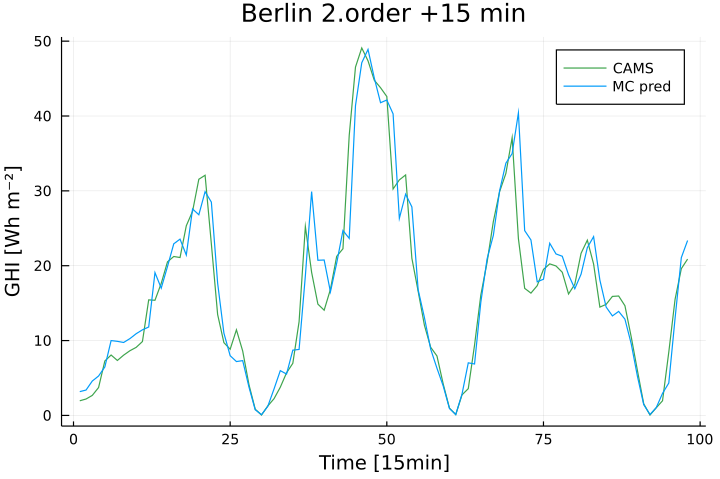

In [55]:
p1 = plot([df3.ghi, df3.pred_ghi], c=[3 1], label=["CAMS" "MC pred"],
#     xticks=(1:12:98, xtime[1:12:98]), 
    xlabel="Time [15min]", ylabel="GHI [Wh m⁻²]", title="Berlin 2.order +15 min")

##### eval diff btwn curves

In [97]:
df111 = df24_ghi_pred #;#[1:2000, :]

In [99]:
df111.mon = Month.(df111.time)

17974-element Vector{Month}:
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 1 month
 ⋮
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months
 12 months

In [110]:
gb = groupby(df111, :mon)

maes_pers = [meanad(g.ghi, g.ghi_pers) for g in gb]
maes_pred = [meanad(g.ghi, g.ghi_pred) for g in gb]
maes_pred_n = [meanad(g.ghi, g.ghi_pred_n) for g in gb]

In [119]:
rmses_pers = [rmsd(g.ghi, g.ghi_pers) for g in gb]
rmses_pred = [rmsd(g.ghi, g.ghi_pred) for g in gb]
rmses_pred_n = [rmsd(g.ghi, g.ghi_pred_n) for g in gb];

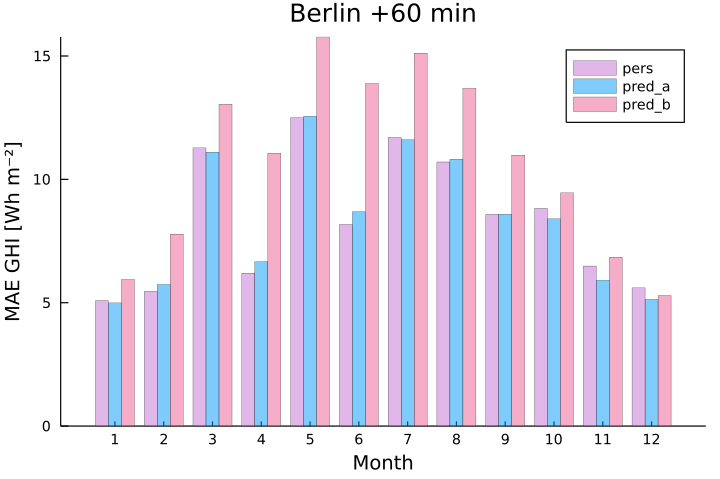

In [122]:
gbp1 = groupedbar([maes_pers maes_pred maes_pred_n], grid=false, 
        label=["pers" "pred_a" "pred_b"], 
        c=[4 1 7], lw=0.2, fillalpha=0.5,
        xticks=1:12, ylim=(0,maximum(maes_pred_n)), 
        xlabel="Month", ylabel="MAE GHI [Wh m⁻²]", title="Berlin +60 min")

In [137]:
lp1 = plot([maes_pers maes_pred maes_pred_n], #grid=false, 
        label=["pers" "pred_a" "pred_b"], 
        c=[4 1 7], fillalpha=0.5, marker=(0.7, stroke(0)), 
        ylim=(0,ceil(maximum(maes_pred_n))), ylabel="MAE GHI [Wh m⁻²]")

lp2 = plot([rmses_pers rmses_pred rmses_pred_n], leg=false, 
        c=[4 1 7], fillalpha=0.5, marker=(0.7, stroke(0)), 
        ylim=(0,ceil(maximum(rmses_pred_n))), ylabel="RMSE GHI [Wh m⁻²]");

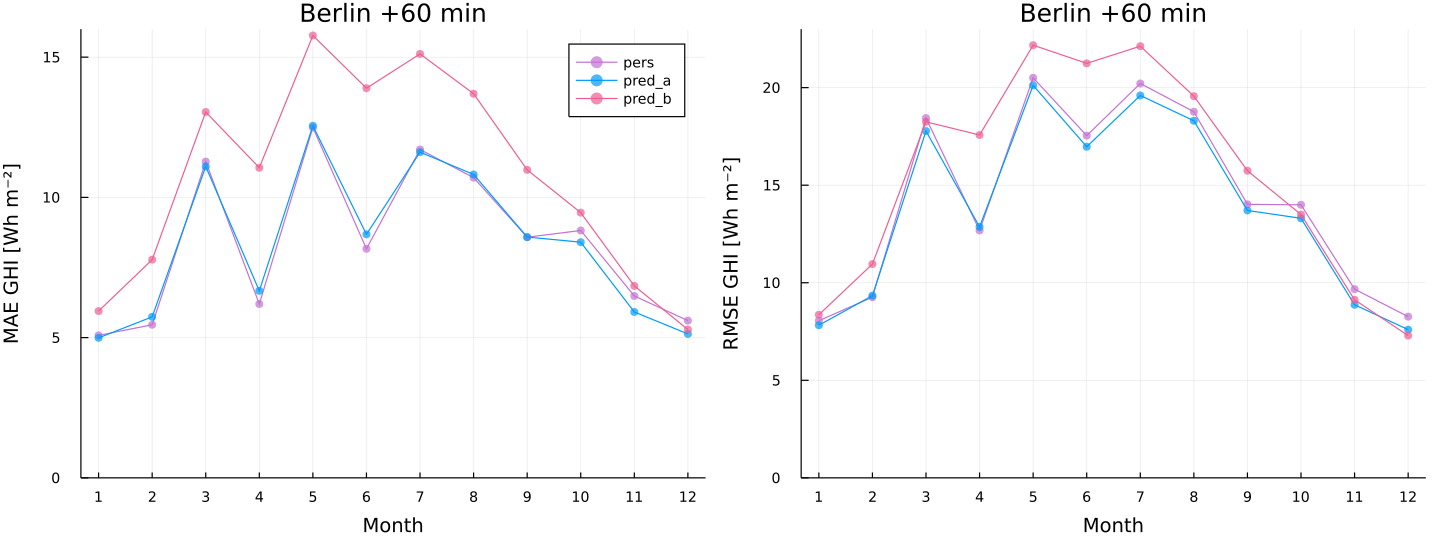

In [138]:
ps = plot(lp1, lp2, layout=@layout([a b]), size=(1200, 450), xtick=1:12, 
    xlabel="Month", title="Berlin +60 min", 
    leftmargin=20px, bottommargin=20px)

In [78]:
p1 = plot([df1.ghi df1.ghi_pers], c=[3 4], label=["real" "pers"],
    ylabel="GHI [Wh m⁻²]", title="Berlin +60 min")

p2 = plot([df1.ghi df1.ghi_pred], c=[3 1], label=["real" "pred_a"],
    ylabel="GHI [Wh m⁻²]")

p3 = plot([df1.ghi df1.ghi_pred_n], c=[3 7], label=["real" "pred_b"], xlabel="Time [15min]", 
    ylabel="GHI [Wh m⁻²]");

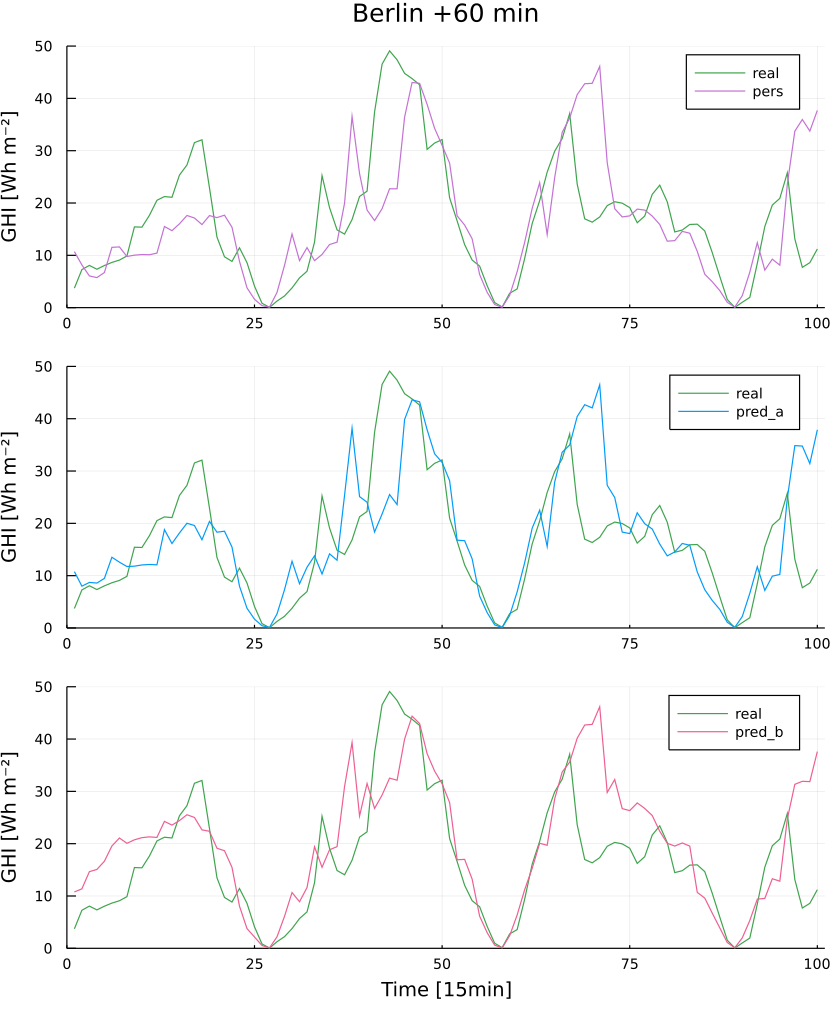

In [84]:
ps = plot(p1, p2, p3, layout=@layout([a;b;c]), xlim=(0,101), ylim=(0,50), size=(700, 850))

#### distri

In [17]:
h_train = histogram(data_train, bins=binStarts, xticks=xti, ylabel="Counts",
    title="Berlin train (02.2004 - 12.2018)")

h_test = histogram(data_test, bins=binStarts, xticks=xti, 
    title="test (2019)");

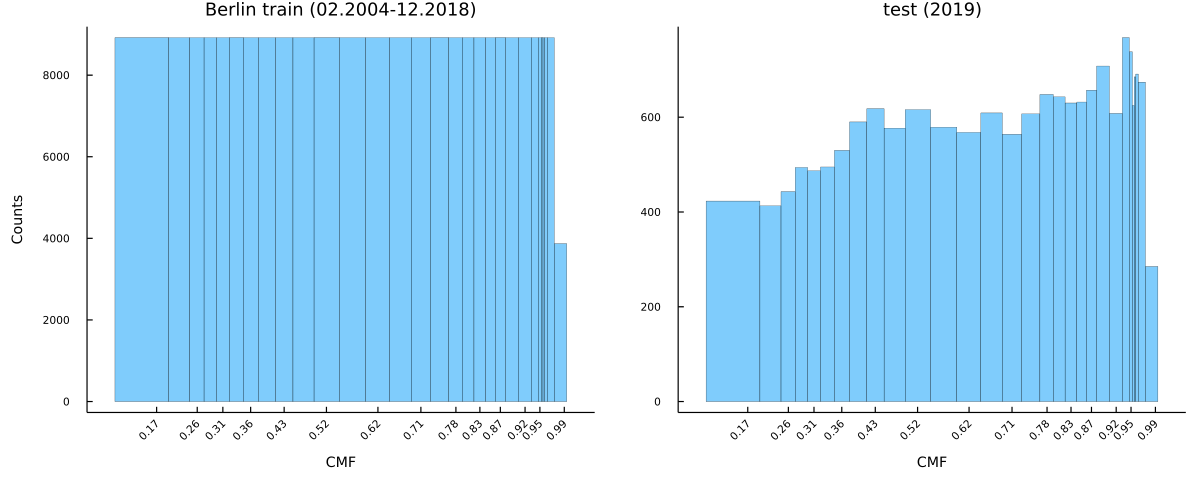

In [23]:
h_ep = plot(h_train, h_test, layout=@layout([a b]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, 
    leftmargin=20px, bottommargin=20px, size=(1000,400))

In [19]:
df11 = getDF(1, 1, N)
df12 = getDF(1, 2, N)
df13 = getDF(1, 3, N)
df14 = getDF(1, 4, N);

#### scatter

In [11]:
df2 = getDF(2, 1, 10)
# df21.dif_cmf = [NaN; diff(df21.real)]
df2.real_cls_prev = Int64.([1; df2.real_cls[1:end-1]])

first(df2, 5)

5×11 DataFrame
 Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred   dif_cls_pred  real_cls_prev 
     │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64    Int64         Int64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3  0.154549              2              1
   2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2  0.134207              1              1
   3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1  0.112377              0              1
   4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1  0.104033              0              1
   5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1  0.0151802             0              1

1 9:15 predicted from 9:00
2 9:30 predicted from 9:15
y dif pred - real at 9:30 vs (Row 2)
x dif cmf real 9:30 - real 9:15 (Row 2 - 1)

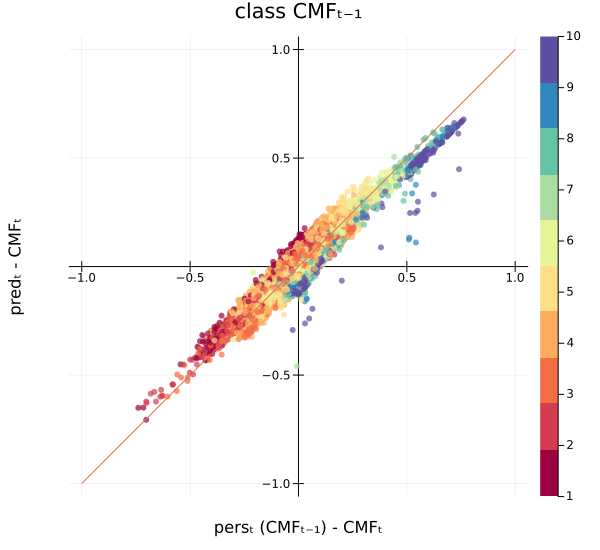

In [12]:
@df df2 scatter(:dif_pers, :dif_pred, marker_z=:real_cls_prev, frame=:origin, 
        c=palette(:Spectral_10), 
        marker=(0.7, stroke(0)), label="", fmt=:png, size=(600,550),
        xlabel="persₜ (CMFₜ₋₁) - CMFₜ", ylabel="predₜ - CMFₜ", title="class CMFₜ₋₁")
plot!(-1:1, -1:1, label="")

In [88]:
gb = groupby(df2, :real_cls)

GroupedDataFrame with 10 groups based on key: real_cls
First Group (1279 rows): real_cls = 1
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64      Int64         Int64         
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3   0.154549               2              1
    2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2   0.134207               1              1
    3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1   0.112377               0              1
    4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1   0.104033               0              1
    5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1   0.0151802              0              1
    6 │ 0.227377         1  0.240145         1   0.0127687              0  0.255325         1   0.0279489              0              1
    7 │ 0.182802         1  0.227377         1   0.0445747              0  0.255325         1   0.0725236              0              1
    8 │ 0.18157          1  0.182802         1   0.00123228             0  0.255325         1   0.0737559              0              1
    9 │ 0.180078         1  0.18157          1   0.00149155             0  0.255325         1   0.0752474              0              1
   10 │ 0.178091         1  0.180078         1   0.00198684             0  0.255325         1   0.0772343              0              1
   11 │ 0.18459          1  0.178091         1  -0.00649838             0  0.255325         1   0.0707359              0              1
  ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮              ⋮
 1269 │ 0.25633          1  0.190261         1  -0.0660697              0  0.255325         1  -0.00100483             0              1
 1270 │ 0.176517         1  0.3559           3   0.179383               2  0.402693         3   0.226177               2              3
 1271 │ 0.179369         1  0.422837         3   0.243468               2  0.361469         3   0.1821                 2              3
 1272 │ 0.191017         1  0.179369         1  -0.0116474              0  0.304889         2   0.113872               1              1
 1273 │ 0.197843         1  0.191017         1  -0.00682613             0  0.255325         1   0.0574827              0              1
 1274 │ 0.188337         1  0.424252         3   0.235915               2  0.361469         3   0.173132               2              3
 1275 │ 0.201647         1  0.302318         2   0.100671               1  0.371948         3   0.170302               2              2
 1276 │ 0.184874         1  0.201647         1   0.0167722              0  0.274445         2   0.0895708              1              1
 1277 │ 0.18662          1  0.423038         3   0.236418               2  0.361469         3   0.174849               2              3
 1278 │ 0.266667         1  0.307581         2   0.0409142              1  0.371948         3   0.105281               2              2
 1279 │ 0.253142         1  0.36159          3   0.108449               2  0.42237          3   0.169228               2              3
                                                                                                                       1257 rows omitted
⋮
Last Group (2024 rows): real_cls = 10
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      

In [95]:
err_pred = [meanad(g.pred, g.real) for g in gb]
err_pers = [meanad(g.pers, g.real) for g in gb]

In [126]:
err_pred .< err_pers

10-element BitVector:
 0
 0
 1
 1
 1
 1
 0
 0
 0
 0

In [111]:
errs = vcat(err_pred, err_pers)

20-element Vector{Float64}:
 0.08811518982537545
 0.07832233896011273
 0.11979673935208222
 0.09928658886410813
 0.10899578112302225
 0.06765894025158821
 0.05541326537891929
 0.055954897461716106
 0.027623323262932195
 0.066326727879665
 0.060053271966327516
 0.06812574921155204
 0.12005925333302456
 0.1030487561588208
 0.11513686808771226
 0.07252460994540501
 0.04952250712540409
 0.03674198877577793
 0.011650384349865569
 0.01715140615555718

In [99]:
tickss = rd.(binMean, 2)
xticks = repeat(string.(tickss), outer=2)

mode = repeat(["pred", "pers"], inner=10);

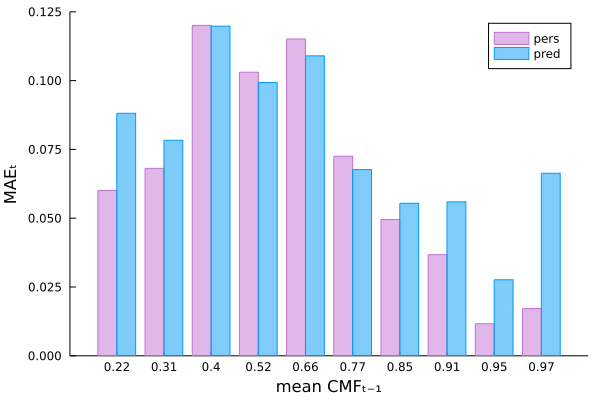

In [128]:
groupedbar(xticks, errs, group=mode, grid=false, 
    c=[4 1], lc=[4 1], fillalpha=0.5,
    ylim=(0,0.125),
    xlabel="mean CMFₜ₋₁", ylabel="MAEₜ")

#### Dif vs dif

In [22]:
df22

8816×16 DataFrame
  Row │ real      neib      pers      dif_neib    dif_pers     real_cls  pred      dif_pred     pred_n    dif_pred_n   mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    dif_hyb_r   
      │ Float64   Float64   Float64   Float64     Float64      Int64     Float64   Float64      Float64   Float64      Int64    Float64   Int64     Float64   Float64      Float64     
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.142949  0.577954  0.269437   0.435005    0.126488           1  0.263847   0.120898    0.276249   0.1333            0  0.269437         0  0.269437   0.126488     0.126488
    2 │ 0.240145  0.188798  0.142949  -0.0513477  -0.0971964          2  0.213818  -0.026327    0.281747   0.0416014         3  0.213818         3  0.213818  -0.026327    -0.026327
    3 │ 0.182802  0.13582   0.240145  -0.0469821   0.0573434          1  0.281747   0.0989448   0.328775   0.145973          3  0.281747         3  0.281747   0.0989448    0.0989448
    4 │ 0.180078  0.117192  0.182802  -0.0628862   0.00272383         1  0.219746   0.0396683   0.281747   0.101669          3  0.219746         3  0.219746   0.0396683    0.0396683
    5 │ 0.18459   0.10863   0.180078  -0.0759591  -0.00451154         1  0.213818   0.0292287   0.281747   0.0971571         3  0.213818         3  0.213818   0.0292287    0.0292287
    6 │ 0.273013  0.182742  0.18459   -0.0902705  -0.088423           4  0.213818  -0.0591943   0.281747   0.00873407        3  0.213818         3  0.213818  -0.0591943   -0.0591943
    7 │ 0.363329  0.294335  0.273013  -0.0689947  -0.0903167          7  0.299544  -0.0637855   0.352263  -0.0110659         1  0.273013         2  0.294335  -0.0903167   -0.0689947
    8 │ 0.391431  0.453826  0.363329   0.0623953  -0.0281014          8  0.412923   0.0214925   0.437017   0.0455867         3  0.412923         4  0.437017   0.0214925    0.0455867
    9 │ 0.562373  0.477125  0.391431  -0.0852479  -0.170942          12  0.415747  -0.146626    0.473733  -0.0886402         4  0.473733         2  0.477125  -0.0886402   -0.0852479
   10 │ 0.791058  0.580445  0.562373  -0.210613   -0.228686          18  0.598229  -0.192829    0.642258  -0.148801          4  0.642258         4  0.642258  -0.148801    -0.148801
   11 │ 0.440617  0.532612  0.791058   0.0919952   0.350442           9  0.796128   0.355512    0.796327   0.355711          4  0.796327         4  0.796327   0.355711     0.355711
  ⋮   │    ⋮         ⋮         ⋮          ⋮            ⋮          ⋮         ⋮           ⋮          ⋮           ⋮          ⋮        ⋮         ⋮         ⋮           ⋮            ⋮
 8807 │ 0.724294  0.457945  0.559908  -0.266349   -0.164386          15  0.606376  -0.117918    0.642258  -0.082036          4  0.642258         4  0.642258  -0.082036    -0.082036
 8808 │ 0.691239  0.53356   0.724294  -0.157679    0.0330548         15  0.721304   0.030065    0.714744   0.0235049         4  0.714744         4  0.714744   0.0235049    0.0235049
 8809 │ 0.725303  0.448998  0.691239  -0.276306   -0.0340642         15  0.703354  -0.0219492   0.714744  -0.0105593         4  0.714744         4  0.714744  -0.0105593   -0.0105593
 8810 │ 0.505786  0.396073  0.725303  -0.109714    0.219517          11  0.714744   0.208958    0.714744   0.208958          4  0.714744         4  0.714744   0.208958     0.208958
 8811 │ 0.371119  0.307768  0.505786  -0.0633513   0.134667           7  0.506681   0.135562    0.535381   0.164262          4  0.535381         4  0.535381   0.164262     0.164262
 8812 │ 0.365446  0.271922  0.371119  -0.093524    0.00567275         7  0.380428   0.0149818   0.437017   0.0715711         3  0.380428         4  0.437017   0.0149818    0.0715711
 8813 │ 0.505302  0.335291  0.365446  -0.170011   -0.139856          11  0.386635  -0.118667    0.437017  -0.0682847         3  0.386635         4  0.437017  -0.1186

In [25]:
describe(df22.dif_pers)

Summary Stats:
Length:         8816
Missing Count:  0
Mean:           -0.004684
Minimum:        -0.801636
1st Quartile:   -0.060707
Median:         -0.001025
3rd Quartile:   0.033982
Maximum:        0.793331
Type:           Float64


In [30]:
function viz_dif(df, steps)
    df.dif_cmf = -df.dif_pers
    max_dif = floor(maximum(df.dif_cmf); digits=1)
    min_dif = floor(minimum(df.dif_cmf); digits=1)    
    difBinStarts = collect(min_dif:0.1:max_dif)
    df.cls_dif_cmf = classify(df.dif_cmf, difBinStarts)
#     df = filter(:dif_neib => d -> !isnan(d), df)    
    gb = groupby(df, :cls_dif_cmf)
    bin_mn = [mean(g.dif_cmf) for g in gb]
    mae_pers = [meanad(g.pers, g.real) for g in gb]
    mae_pred = [meanad(g.pred, g.real) for g in gb]
    mae_pred_b = [meanad(g.pred_n, g.real) for g in gb]
    mae_neib = [meanad(g.neib, g.real) for g in gb]
    mae_hyb_m = [meanad(g.hyb_m, g.real) for g in gb]
    
    rmse_pers = [rmsd(g.pers, g.real) for g in gb]
    rmse_pred = [rmsd(g.pred, g.real) for g in gb]
    rmse_pred_b = [rmsd(g.pred_n, g.real) for g in gb]
#     if steps == 1
#         difs = [dif_pers_mn, dif_pred_a, dif_neib]
#         cl = [4 1 5]
#     else
#         dif_pred_b = [mean(g.dif_pred_n) for g in gb]
#         difs = [dif_pers_mn, dif_pred_a, dif_pred_b]
#         cl = [4 1 7]
#     end
# #     steps == 2 ? lab = ["pers" "pred_a" "pred_b"] : lab = false
#     steps == 1 ? lab = ["pers" "pred_a" "neib_w"] : lab = false
    labDic = Dict(1 => "realₜ₊₁", 2 => "realₜ₊₂",
                  3 => "realₜ₊₃", 4 => "realₜ₊₄")
    real = labDic[steps]
    p = plot(bin_mn, [mae_pers mae_pred mae_pred_b mae_neib mae_hyb_m], c=[4 1 7 5 6], 
        label=["pers" "pred_a" "pred_b" "neib_w" "hyb_m"], leg=:bottomright,
        marker=(0.7, stroke(0)), frame=:origin, #aspect_ratio=1, 
        xticks=rd.(bin_mn,2), xrotation=45, tickfontsize=6, 
        xlabel="ΔCMF ($(real) - realₜ)", ylabel="MAE", title="+$(15*steps) min") 
    #[rmse_pers rmse_pred rmse_pred_b]
    return p
end

viz_dif (generic function with 1 method)

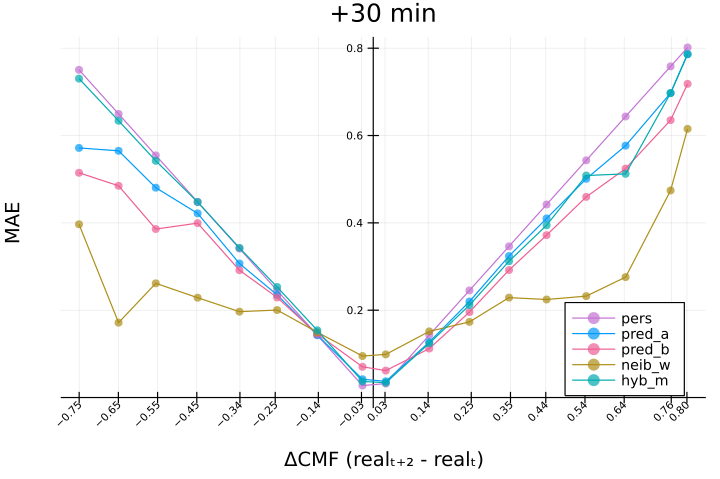

In [31]:
dif2 = viz_dif(df22, 2)

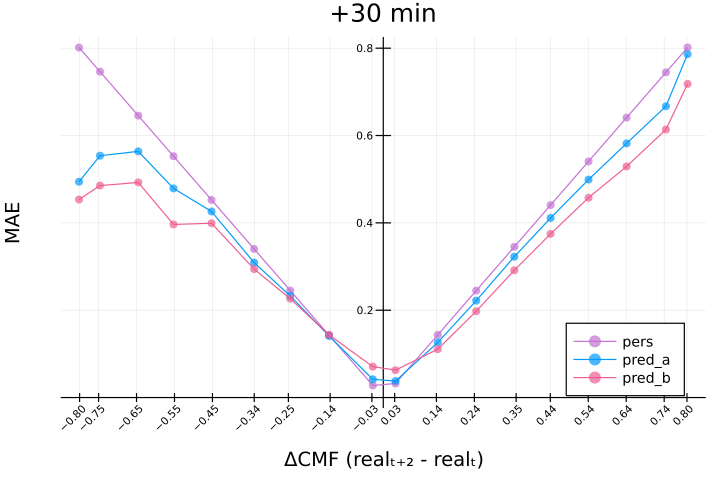

In [51]:
dif2 = viz_dif(df22, 2)

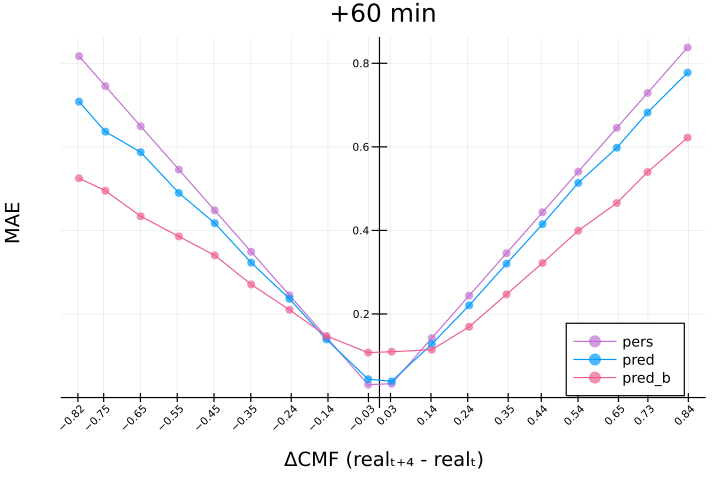

In [47]:
dif4 = viz_dif(df24, 4)

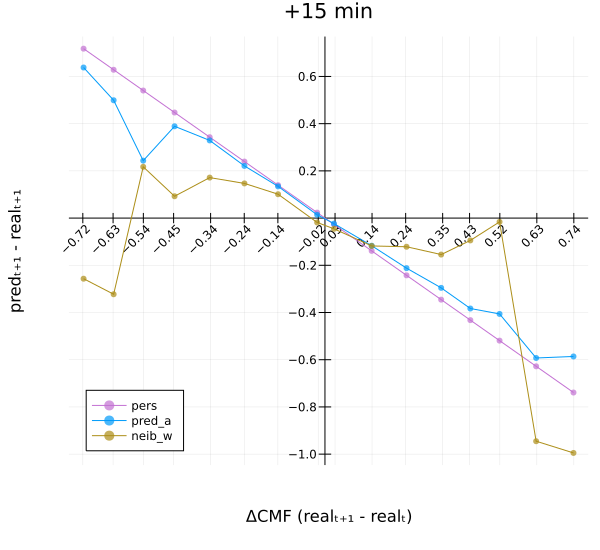

In [14]:
p21_w = dif_viz(df21, 1)

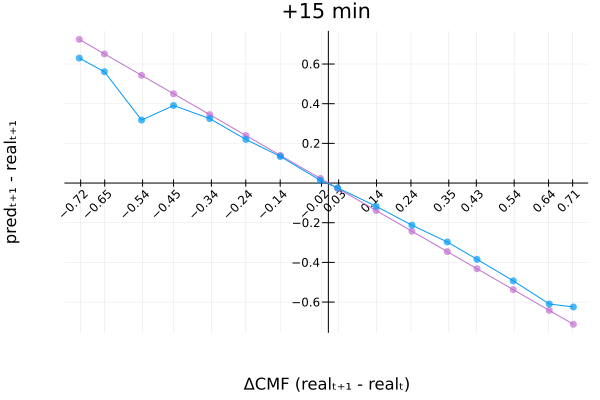

In [90]:
p21 = dif_viz(df21, 1)

In [91]:
p22 = dif_viz(df22, 2)
p23 = dif_viz(df23, 3)
p24 = dif_viz(df24, 4);

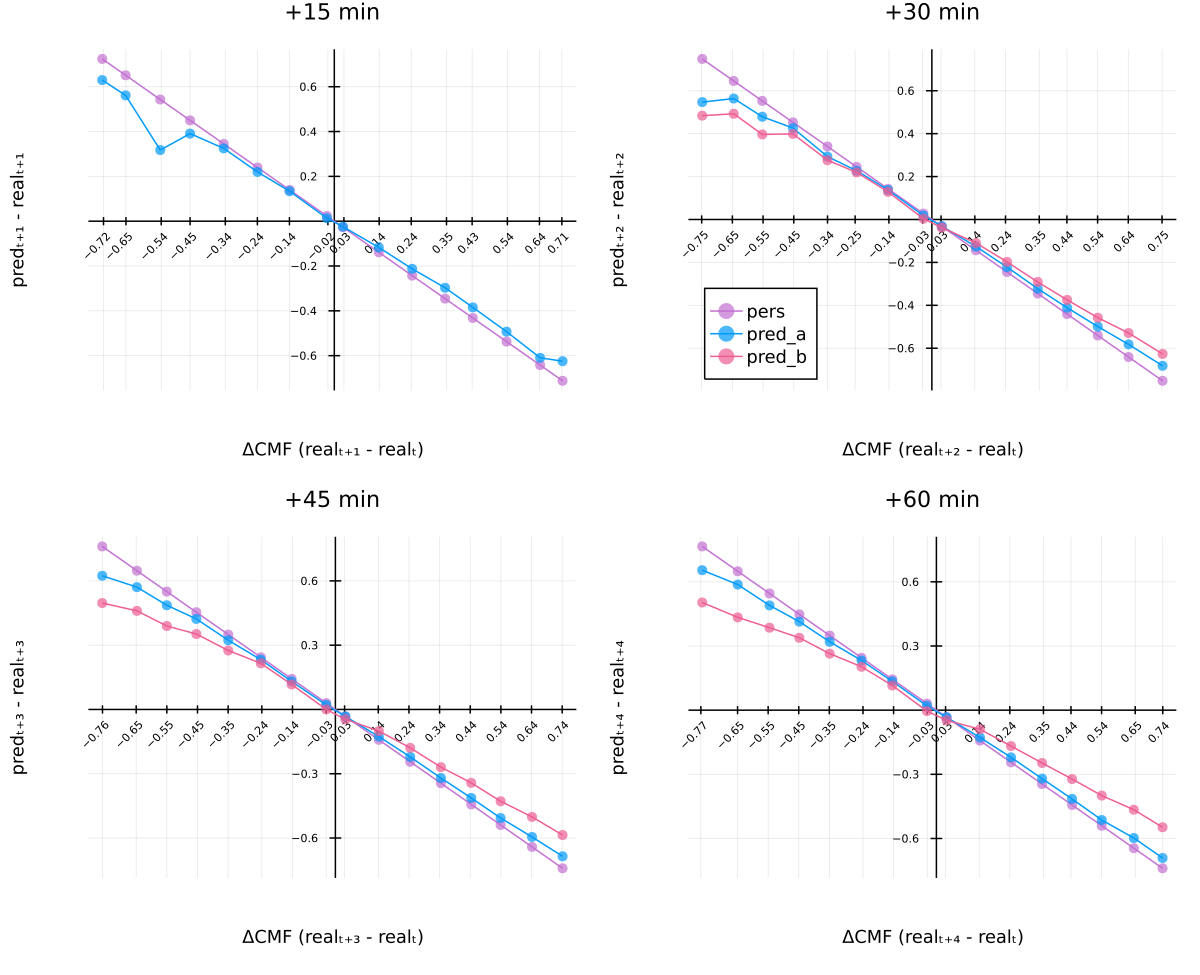

In [93]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), tickfontsize=5, labelfontsize=8, titlefontsize=10, 
    size=(800, 650), dpi=:150, fmt=:png)

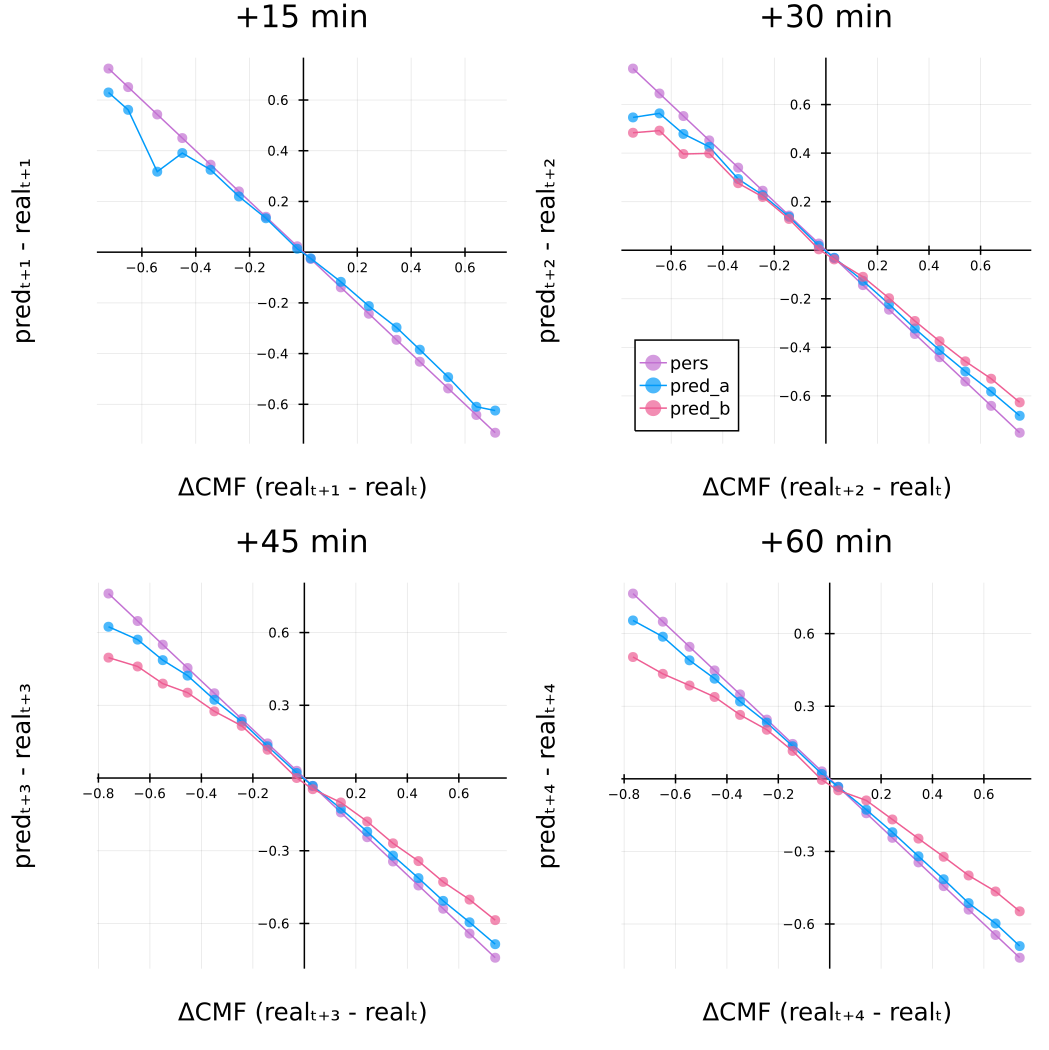

In [44]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), fmt=:png, size=(700, 700))

#### heatmaps

##### train

In [42]:
# rewrite transition matrix
state = data_train_cls
len = length(state)
T2 = zeros(N, N, N) # 2. od
for i in 2:len-1
    T2[state[i-1], state[i], state[i+1]] += 1
end
sumZ = sum(T2; dims=3)
T22 = T2./sumZ
T_train = sum([T22[:, :, i] * binMean[i] for i in 1:30]);

30×30 Matrix{Float64}:
   0.213818    0.281747    0.314274  0.338495  0.37369   0.420056  0.463879  0.494226  0.520531  …  NaN         NaN         NaN           0.430793  NaN         NaN         NaN         0.915987
   0.219746    0.246403    0.296921  0.328775  0.376172  0.40379   0.444227  0.482014  0.544883       0.888606    0.666498  NaN           0.396424    0.396424  NaN           0.947112  0.966057
   0.245249    0.250008    0.276249  0.328667  0.35264   0.384202  0.43275   0.490463  0.492647       0.642515    0.587929    0.606445    0.67339   NaN           0.447733  NaN         0.942857
   0.237517    0.260379    0.271684  0.299544  0.352263  0.375359  0.420396  0.470483  0.496743       0.693367    0.786182    0.780998  NaN           0.950541    0.509034    0.876105  0.97409
   0.254423    0.278164    0.282097  0.299934  0.324791  0.383228  0.412923  0.447832  0.488569       0.881134    0.683682    0.800293    0.790752    0.430793  NaN           0.93093   0.925542
   0.255008  

##### test

In [25]:
s_t_2 = df21.pers_cls
s_t_1 = df21.real_cls
pred = df21.pred;

T, T_ct = zeros(N, N), zeros(N, N)
len = length(pred)
for i in 1:len-1
    T[s_t_2[i], s_t_1[i]] += pred[i+1]
    T_ct[s_t_2[i], s_t_1[i]] += 1
end

T_test = T ./ T_ct;

In [55]:
hm_train = heatmap(T_train, c=:jet, clim=(0,1), title="CMFₜ training") 

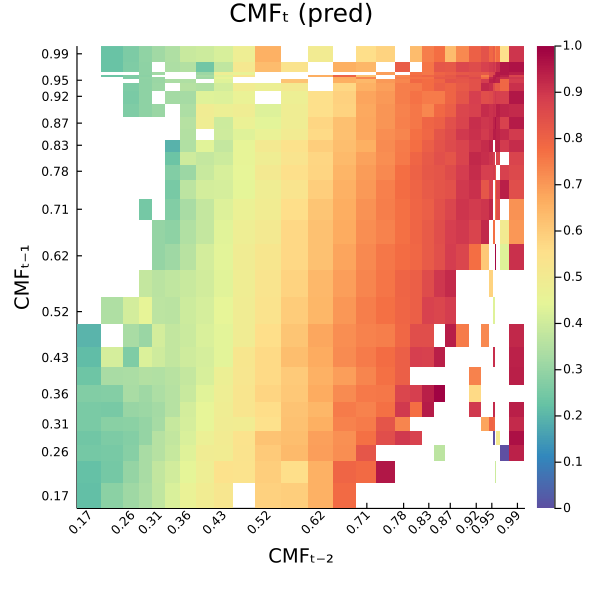

In [38]:
hm_test = heatmap(binMean, binMean, T_test, c=cgrad(:Spectral_10, rev=true), clim=(0,1), grid=false, 
    title="CMFₜ (pred)", size=(500,500), tickfontsize=7,
    xticks=xti, yticks=xti, xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁")

##### dif_pred

In [37]:
s_t_2 = df21.pers_cls
# s_t_1 = df21.real_cls
dif = df21.dif_pred;

T_dif, T_ct = zeros(N, N), zeros(N, N)
len = length(dif)
for i in 2:len-1
    T_dif[s_t_2[i-1], s_t_2[i]] += dif[i]
    T_ct[s_t_2[i-1], s_t_2[i]] += 1
end

T_dif_mn = T_dif ./ T_ct;

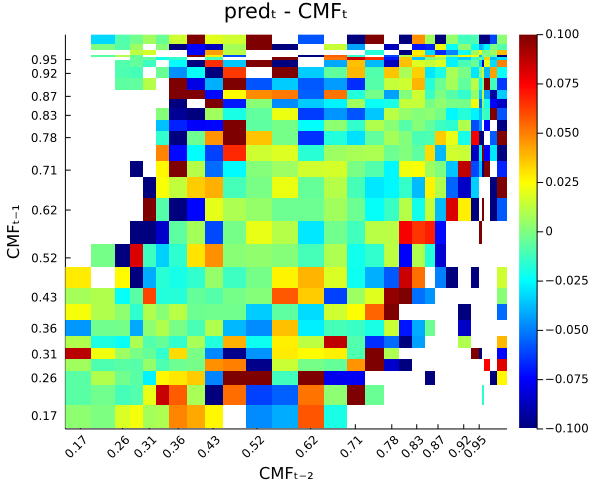

In [38]:
heatmap(ticks, ticks, T_dif_mn, c=:jet, clim=(-0.1,0.1), grid=false, fmt=:png, dpi=100, size=(600,500),
    xticks=xti, yticks=xti, xrotation=45,
    rightmargin=25px, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", title="predₜ - CMFₜ") 

#### pACF

In [8]:
lags = collect(0:10)
pACF_train = pacf(data_train, lags)

11-element Vector{Float64}:
  1.0
  0.8950278187353926
 -0.1297686872609787
  0.1480611713779651
  0.018718040107171124
  0.056977667039441175
  0.03379964557040376
  0.03609850297600837
  0.024416348982315227
  0.023665355381098152
  0.02077301939930371

In [9]:
pACF_test = pacf(data_test, lags)

11-element Vector{Float64}:
  1.0
  0.8933969888378854
 -0.1019465568298232
  0.143702737015086
  0.006365301214471336
  0.06269634124419815
  0.035294049940034045
  0.04248351833356964
  0.02108308288209466
  0.014819590597472499
  0.024580267692225256

In [11]:
σ = 1.96 / √length(data_test)

0.014617506820435396

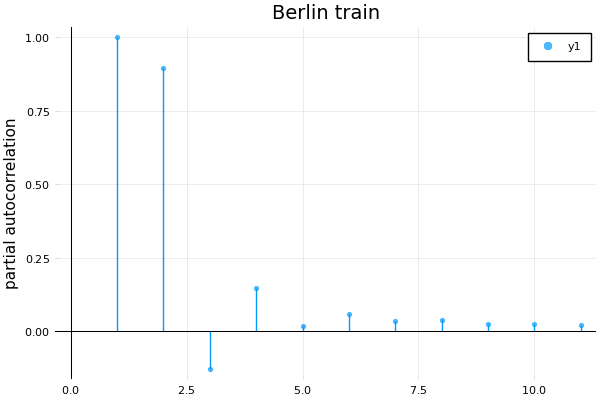

In [21]:
acfTr = plot(pACF_train, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="Berlin train", ylabel="partial autocorrelation")

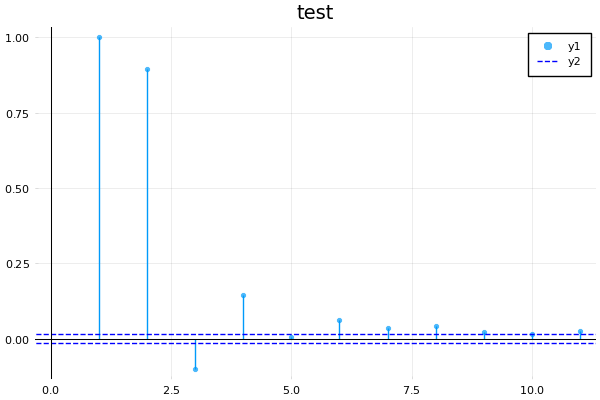

In [19]:
acfTe = plot(pACF_test, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="test")
hline!([-σ, σ], ls=:dash, lc=:blue)

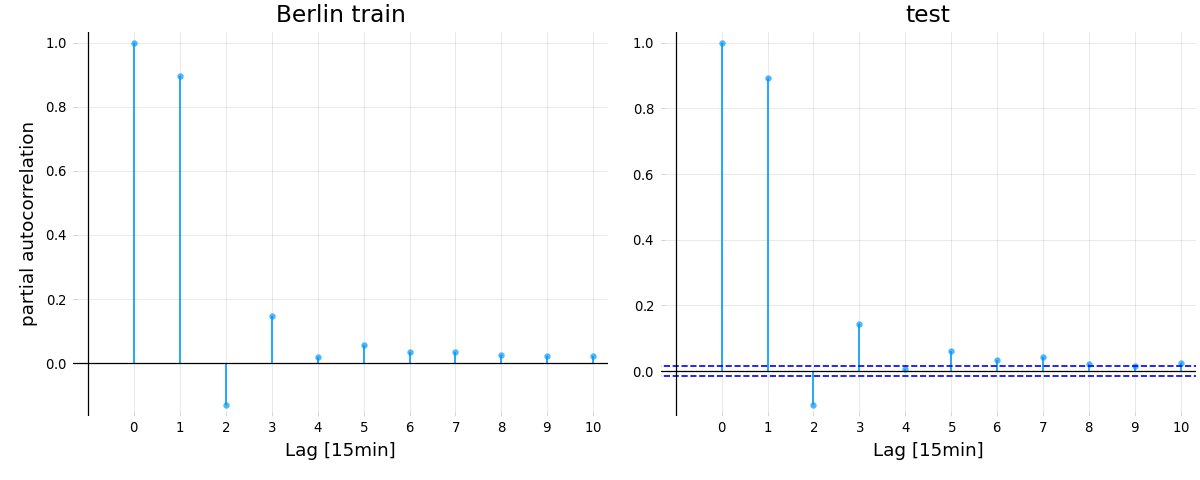

In [22]:
acfs = plot(acfTr, acfTe, layout=@layout([a b]), leg=false, frame=:zerolines, 
    xticks=(1:11, lags), yticks=-0.2:0.2:1.0, xlabel="Lag [15min]", 
    leftmargin=20px, bottommargin=20px, dpi=120, size=(1000,400))

#### log likelihood

In [83]:
function llh(nc) # num_cls
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    return loglikelihood(Normal(), data_train_cls)
end

llh (generic function with 1 method)

In [89]:
nc = 2:2:30
llhs = Float64[]
for n in nc
    push!(llhs, llh(n))
end
llhs

15-element Vector{Float64}:
 -580423.8840553071
      -1.24944238405531e6
      -2.275277884055311e6
      -3.657908384055311e6
      -5.397357884055309e6
      -7.493629384055279e6
      -9.946683884055227e6
      -1.2756564384055194e7
      -1.5923327884055194e7
      -1.9446750384055227e7
      -2.3327043884055242e7
      -2.7564205384055242e7
      -3.21581138840552e7
      -3.710885038405514e7
      -4.241642988405506e7

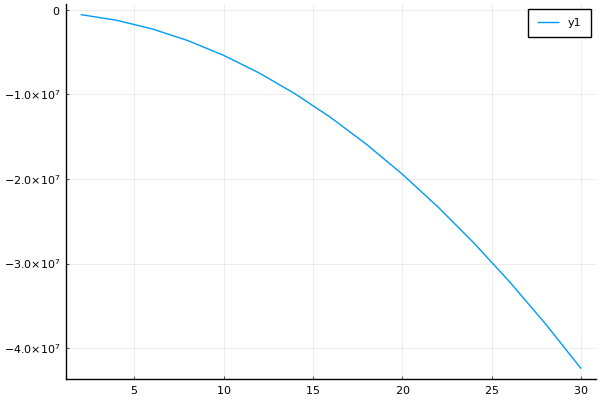

In [90]:
plot(nc, llhs)

In [69]:
data_train_cls_20, binStarts_20, binMean = getBins(data_train, 20) # city-specific
data_test_cls_20 = classify(data_test, binStarts_20);

In [73]:
data_train_cls_10, binStarts_10, binMean = getBins(data_train, 10) # city-specific
data_test_cls_10 = classify(data_test, binStarts_10);

In [19]:
?loglikelihood()

search: loglikelihood nullloglikelihood



```
loglikelihood(model::StatisticalModel)
```

Return the log-likelihood of the model.

---

```
loglikelihood(model::StatisticalModel, ::Colon)
```

Return a vector of each observation's contribution to the log-likelihood of the model. In other words, this is the vector of the pointwise log-likelihood contributions.

In general, `sum(loglikehood(model, :)) == loglikelihood(model)`.

---

```
loglikelihood(model::StatisticalModel, observation)
```

Return the contribution of `observation` to the log-likelihood of `model`.

---

```
loglikelihood(d::UnivariateDistribution, x::Union{Real,AbstractArray})
```

The log-likelihood of distribution `d` with respect to all samples contained in `x`.

Here `x` can be a single scalar sample or an array of samples.

---

```
loglikelihood(d::MultivariateDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a vector of length `dim(d)`, a matrix with `dim(d)` rows, or an array of vectors of length `dim(d)`.

---

```
loglikelihood(d::MatrixDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a matrix of size `size(d)`, a three-dimensional array with `size(d, 1)` rows and `size(d, 2)` columns, or an array of matrices of size `size(d)`.


In [56]:
llhTr = loglikelihood(Normal(), data_train)

-313009.91146532213

In [57]:
llhTe = loglikelihood(Normal(), data_test)

-21397.903364259386

In [62]:
llhTr = loglikelihood(Normal(), data_train_cls)

-4.241642988405506e7

In [70]:
llhTr_20 = loglikelihood(Normal(), data_train_cls_20)

-1.9446750384055227e7

In [74]:
llhTr_10 = loglikelihood(Normal(), data_train_cls_10)

-5.397357884055309e6

In [63]:
llhTe = loglikelihood(Normal(), data_test_cls)

-3.130544095888464e6

In [71]:
llhTe_20 = loglikelihood(Normal(), data_test_cls_20)

-1.4339175958884826e6

In [50]:
tr = fit(Normal, data_train)

Normal{Float64}(μ=0.6560004587373912, σ=0.266667624417318)

In [51]:
te = fit(Normal, data_test)

Normal{Float64}(μ=0.6905375446529478, σ=0.2561302274954425)

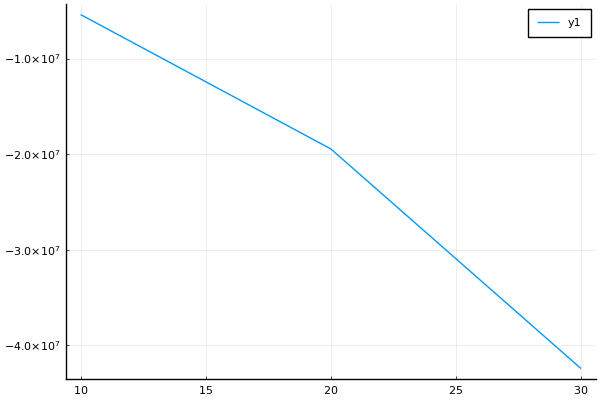

In [75]:
plot([10,20,30],[llhTr_10, llhTr_20, llhTr])

In [32]:
?logpdf

search: logpdf logpdf! gradlogpdf componentwise_logpdf



```
logpdf(d::UnivariateDistribution, x::Real)
```

Evaluate the logarithm of probability density (mass) at `x`.

See also: [`pdf`](@ref).

---

```
logpdf(d::MultivariateDistribution, x::AbstractArray)
```

Return the logarithm of probability density evaluated at `x`.

  * If `x` is a vector, it returns the result as a scalar.
  * If `x` is a matrix with n columns, it returns a vector `r` of length n, where `r[i]` corresponds to `x[:,i]`.

`logpdf!(r, d, x)` will write the results to a pre-allocated array `r`.

---

```
logpdf(d::MatrixDistribution, AbstractMatrix)
```

Compute the logarithm of the probability density at the input matrix `x`.

---

```
logpdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the logarithm of the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [68]:
logpdf(Normal(), data_test_cls)

17979-element Vector{Float64}:
  -41.418938533204674
  -41.418938533204674
   -5.418938533204673
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -2.9189385332046727
   -2.9189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
    ⋮
  -32.918938533204674
  -25.418938533204674
  -25.418938533204674
  -25.418938533204674
  -41.418938533204674
  -61.418938533204674
  -72.91893853320467
  -98.91893853320467
 -113.41893853320467
 -113.41893853320467
 -181.41893853320468
 -265.41893853320465

In [60]:
logTr = logpdf(tr, data_train)

267607-element Vector{Float64}:
 -0.7390725965514602
 -0.749636184929457
 -0.9240713626038126
 -1.1783234851667956
 -1.3893323379861149
 -1.2883715572680885
 -0.26993290455632035
 -0.40655707004413544
 -0.19677151570201512
 -0.006964715412618672
 -0.5507346893012293
 -0.790886722827745
 -0.8046691133606088
  ⋮
 -0.3562744655647867
  0.05127298864727248
  0.19662686395729168
  0.039839927341740244
  0.3414563485281543
  0.33286117071197285
  0.35213004425142935
  0.14783879409896383
  0.12340973285210421
  0.21045757875799098
 -0.0026369544943598555
 -0.23750603510277846

In [53]:
llhTe = logpdf(te, data_test)

17979-element Vector{Float64}:
 -0.01752145846402109
 -0.05392801107719092
 -0.9083831516752008
 -1.6166132243464204
 -1.8422429123577257
 -1.7731328475780017
 -1.1029431387500688
 -1.1918485209662328
 -1.5216937402817672
 -1.5312426498579461
 -1.5428315219895616
 -1.5583213354757561
 -1.507881985765142
  ⋮
 -0.18503293299388468
 -0.33449135055410495
 -0.43436536144009863
 -0.36235717492673625
 -0.06179274438676452
  0.18161563814145
  0.3685574836507881
  0.4324253778135221
  0.43816881306510924
  0.43894165551833586
  0.2911193421612708
  0.05236366690123817

In [24]:
logliTe = log.(data_test)

17979-element Vector{Float64}:
 -0.8103734477009982
 -0.8320374233083325
 -1.3114217087068083
 -1.7679514969989036
 -1.9452681132189922
 -1.8885433055480856
 -1.4265113346931475
 -1.4811477213458324
 -1.6993526023968981
 -1.7061165219644234
 -1.7143651820632337
 -1.7254596994732307
 -1.689620593135623
  ⋮
 -0.9076992528436422
 -0.9912325096523066
 -1.0463249255396996
 -1.0066360789490105
 -0.8366726777590361
 -0.6825989110544289
 -0.5248884431861042
 -0.4260869537570588
 -0.33400131949324074
 -0.33689792777871597
 -0.1842073784687699
 -0.08668272175935691

KSDist(n=100)

#### mn ± sd 

In [41]:
h21 = hist_dif_pred_pers(df21, 2, 1)
h22 = hist_dif_pred_pers(df22, 2, 2)

In [43]:
h21_cls = hist_cls_dif_pred_pers(df21, 2, 1)
h22_cls = hist_cls_dif_pred_pers(df22, 2, 2)

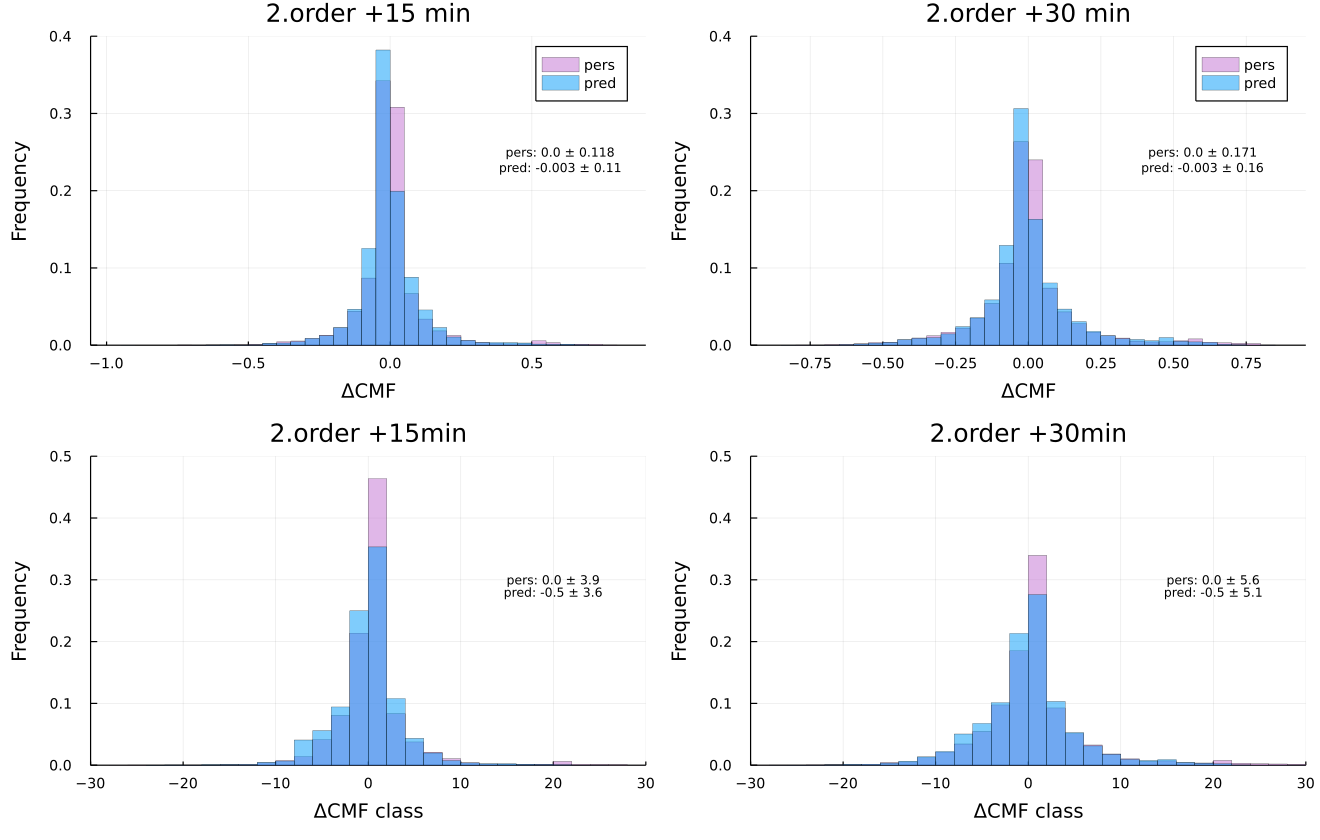

In [49]:
hists = plot(h21, h22, h21_cls, h22_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

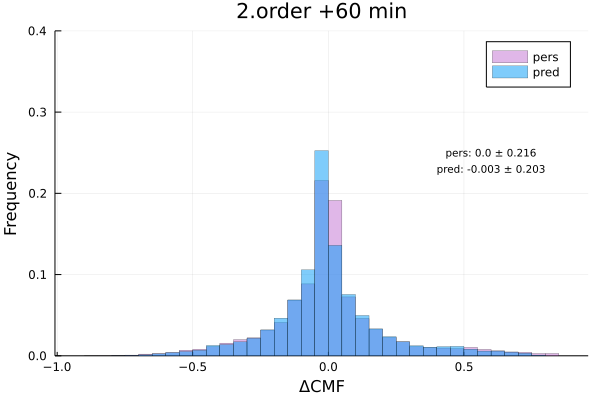

In [60]:
h23 = hist_dif_pred_pers(df23, 2, 3)
h24 = hist_dif_pred_pers(df24, 2, 4)

In [61]:
h23_cls = hist_cls_dif_pred_pers(df23, 2, 3)
h24_cls = hist_cls_dif_pred_pers(df24, 2, 4);

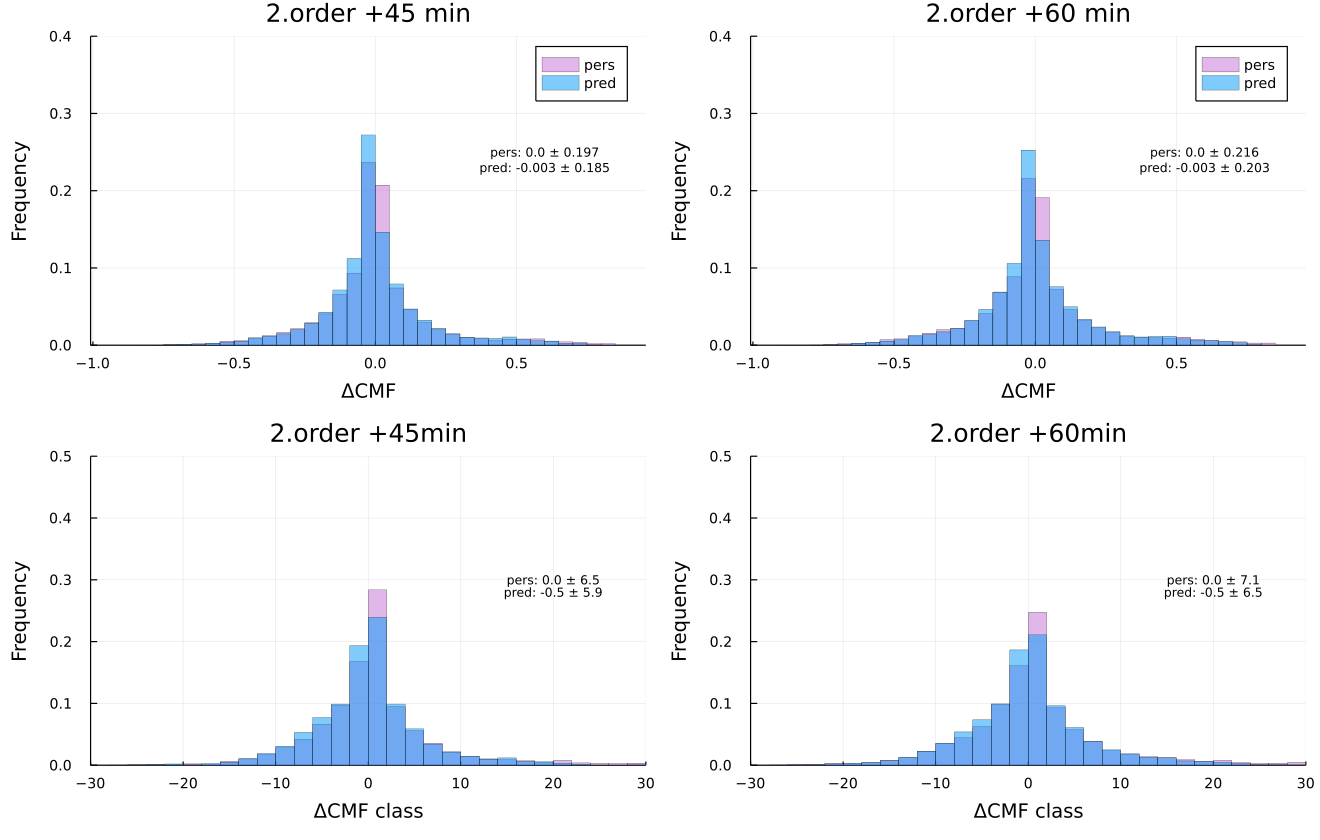

In [62]:
hists34 = plot(h23, h24, h23_cls, h24_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

In [24]:
function viz_mn_sd(df; tit="2. order +$(15*2) min", ylim1=0.35)
    gb = groupby(df, :real_cls)
    mns_real = [mean(g.real) for g in gb]
    mns_pers = [mean(g.pers) for g in gb]
    mns_pred = [mean(g.pred) for g in gb]
    mns_pred_n = [mean(g.pred_n) for g in gb];

    sds_real = [std(g.real) for g in gb]
    sds_pers = [std(g.pers) for g in gb]
    sds_pred = [std(g.pred) for g in gb]
    sds_pred_n = [std(g.pred_n) for g in gb];

    if df == df22 
        (ylab1, ylab2) = ("mean", "standard deviation") 
        leg1 = :bottomright
    else 
        (ylab1, ylab2) = ("", "")
        leg1 = :none
    end
    mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n], c=[3 4 1 7], leg=leg1, 
            ylabel=ylab1, title=tit)
    sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n], c=[3 4 1 7], leg=false, 
            xlabel="real CMF", ylabel=ylab2, ylim=(0,ylim1))
    return mns, sds
end

viz_mn_sd (generic function with 1 method)

In [41]:
mn2, sd2 = viz_mn_sd(df22)

(Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4})

In [29]:
mn3, sd3 = viz_mn_sd(df23; tit="+$(15*3) min")
mn4, sd4 = viz_mn_sd(df24; tit="+$(15*4) min")

(Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4})

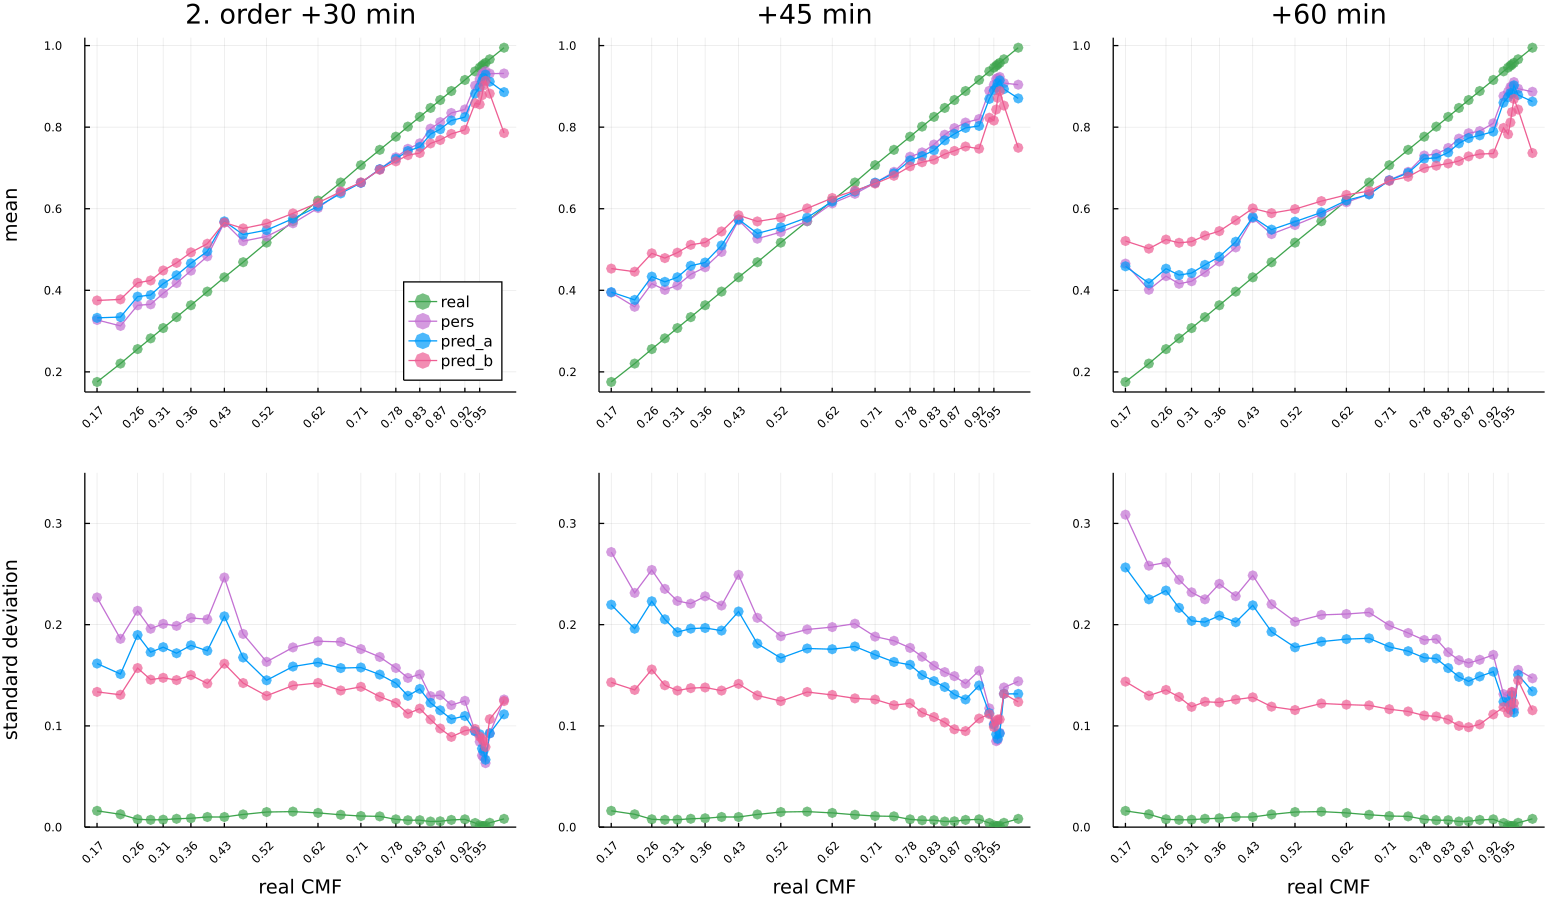

In [30]:
p = plot(mn2, mn3, mn4, sd2, sd3, sd4, layout=@layout([a b c; d e f]), marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

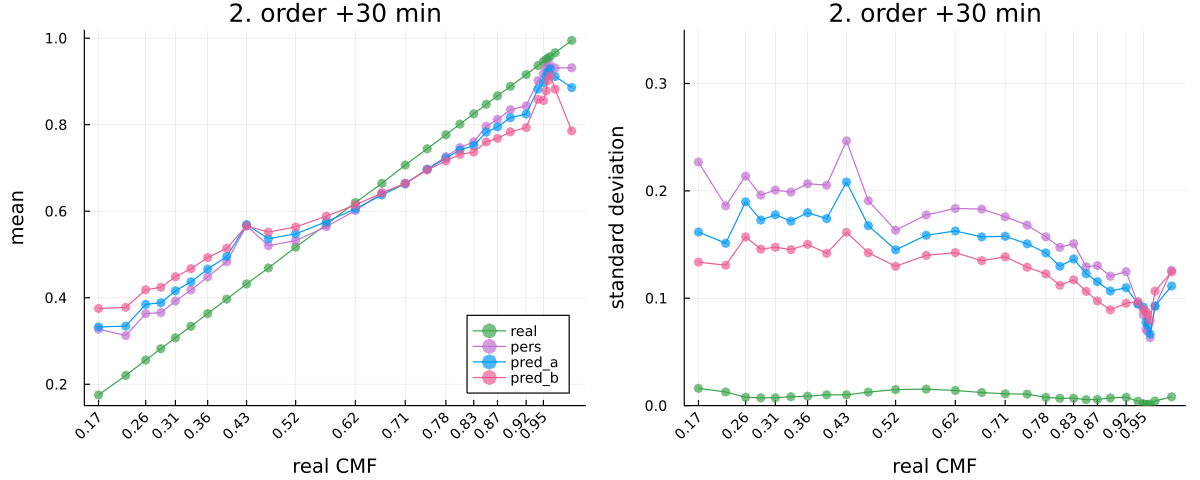

In [44]:
p = plot(mn2, sd2, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, size=(1000,400))

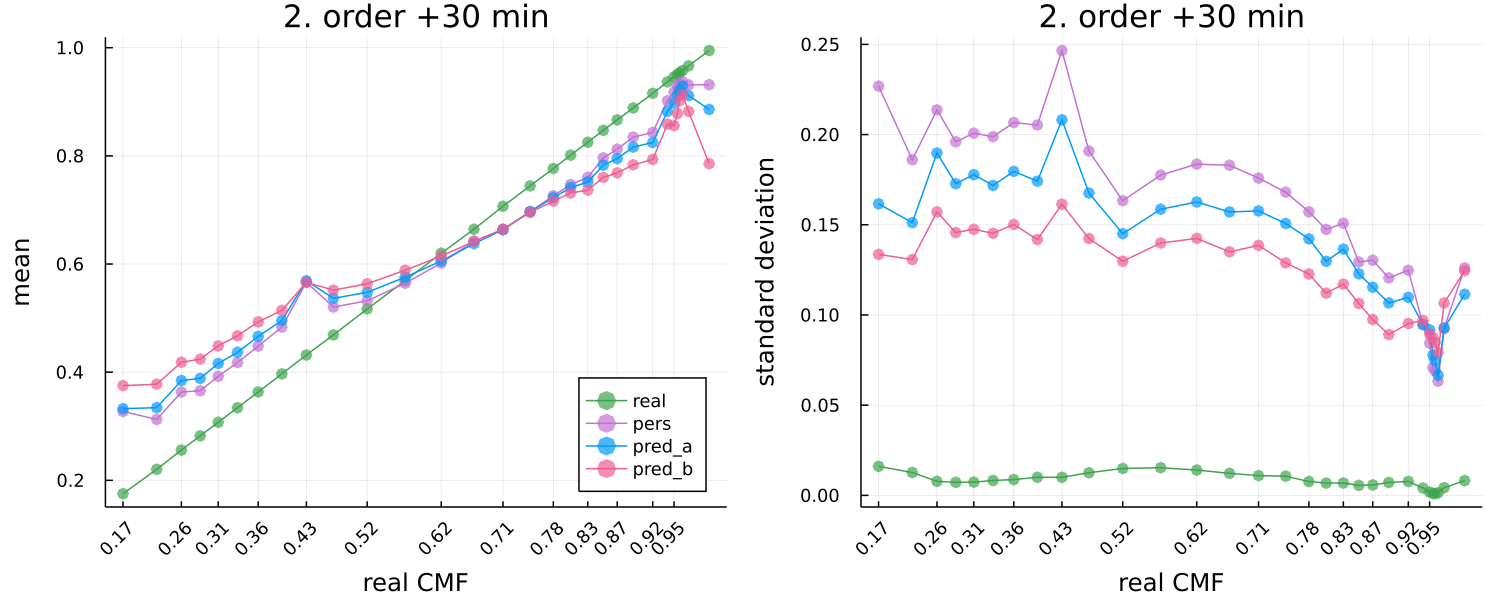

In [78]:
p = plot(mns, sds, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

#### errors

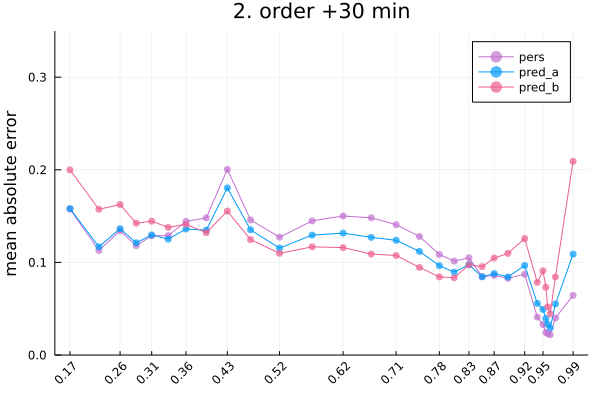

In [56]:
mae2 = viz_err(df22, binMean, xti; tit="2. order +$(15*2) min", err="mae")

In [53]:
mae3 = viz_err(df23, binMean, xti; tit="+$(15*3) min", err="mae")
mae4 = viz_err(df24, binMean, xti; tit="+$(15*4) min", err="mae")

rmse2 = viz_err(df22, binMean, xti; err="rmse")
rmse3 = viz_err(df23, binMean, xti; err="rmse")
rmse4 = viz_err(df24, binMean, xti; err="rmse");

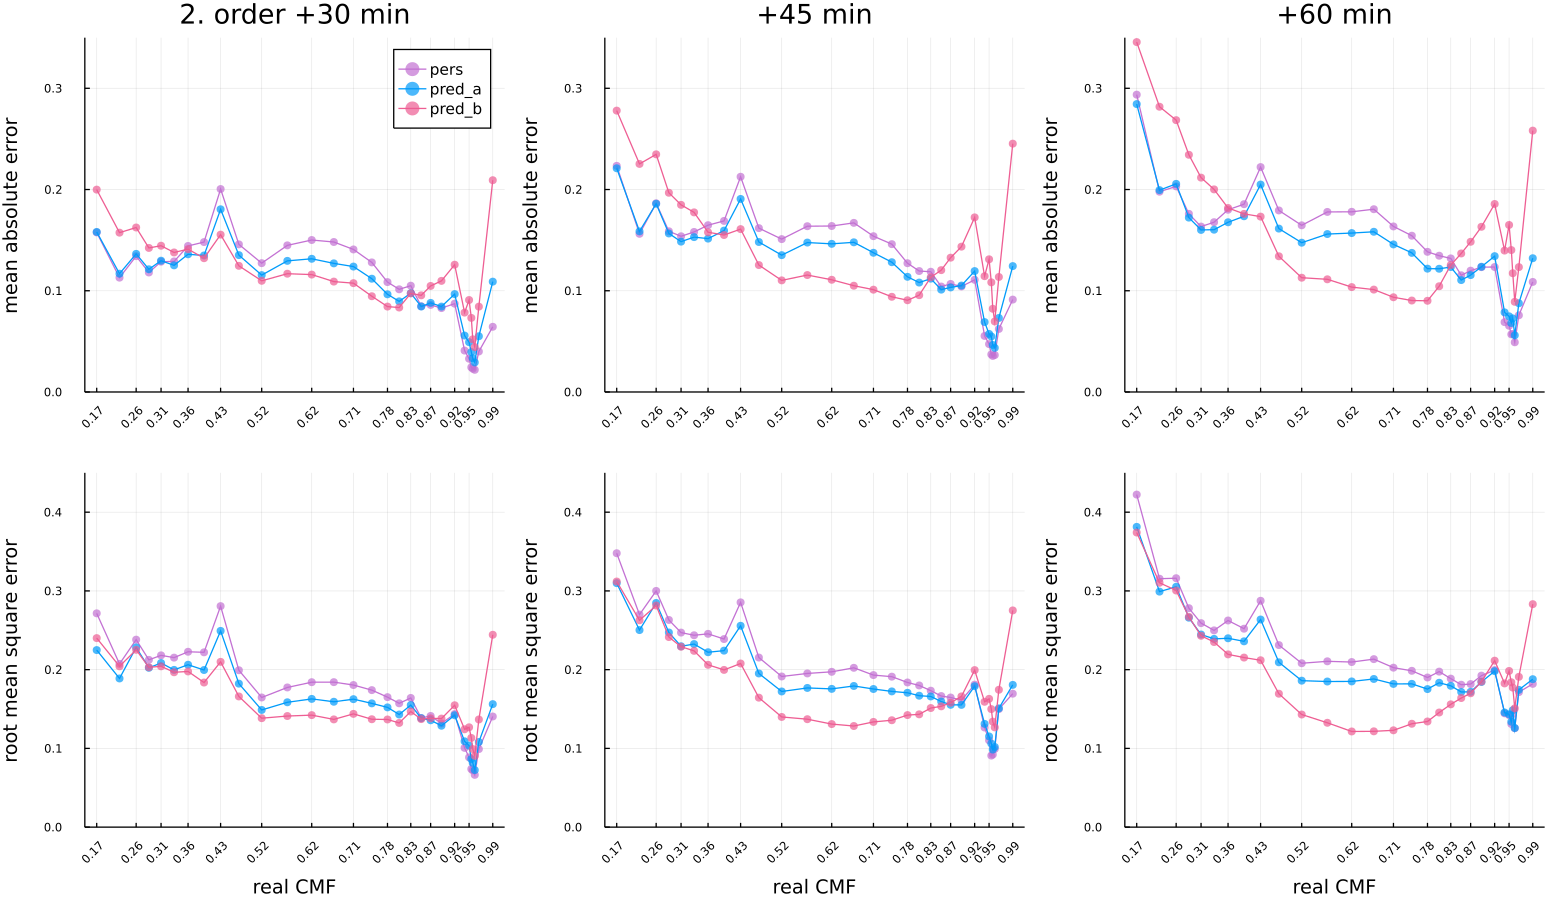

In [57]:
errs = plot(mae2, mae3, mae4, rmse2, rmse3, rmse4, layout=@layout([a b c; d e f]), 
    tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

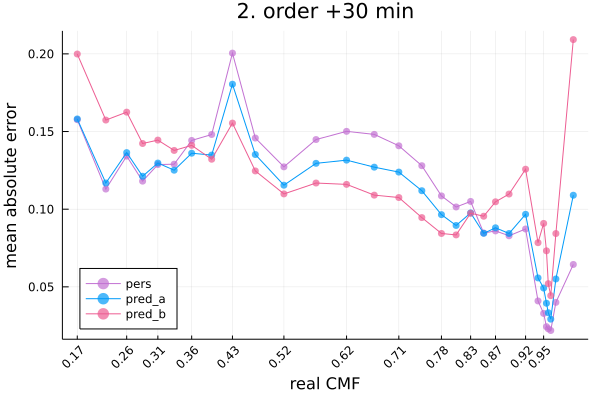

In [83]:
maes = viz_err(binMean, df22, tit; ticks=ticks, err="mae")

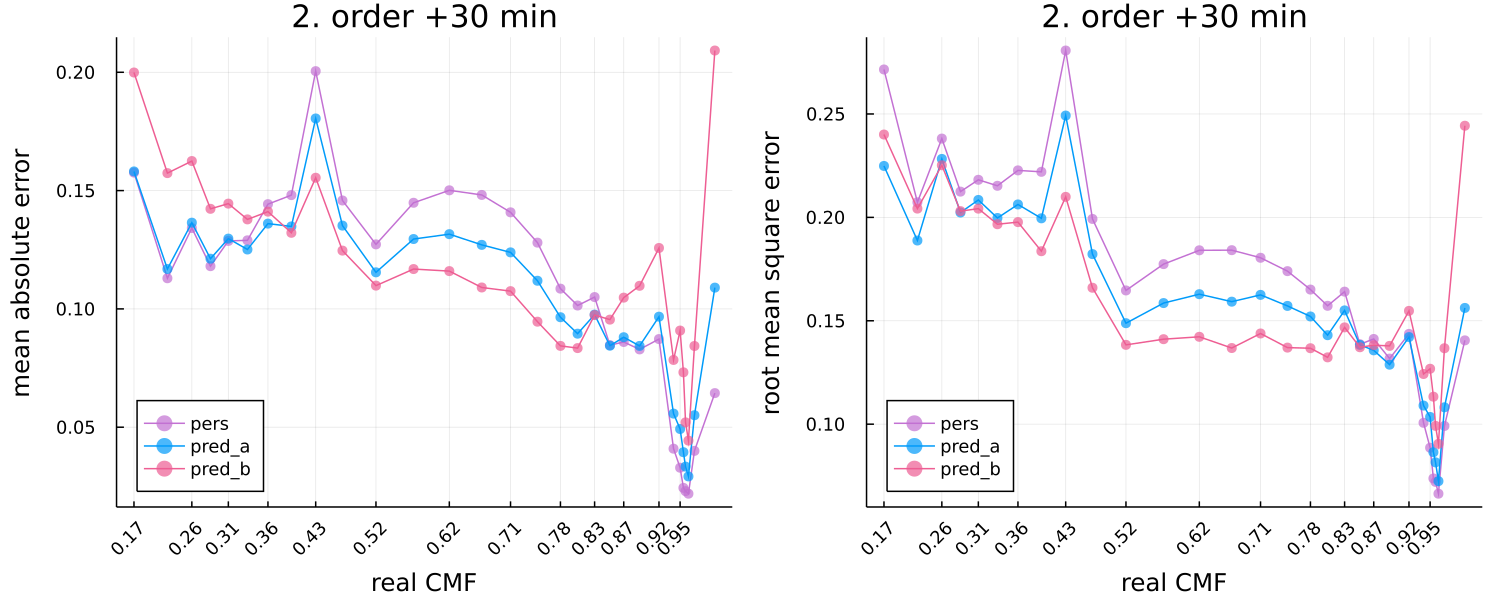

In [86]:
errs = plot(maes, rmses, layout=@layout([a b]), 
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

####  boxplot

In [45]:
function viz_box(df, steps, tit; pred="pred")
    pred == "new" ? 
        (dif = df.dif_pred_n[1+steps:end]) :  
        (dif = df.dif_pred[1+steps:end])
    pred == "new" ? ylab = "pred_n" : ylab = "pred"
    b = boxplot(df.real_cls[1:end-steps], dif, leg=false, marker=(0.3, stroke(0)), lw=.7,
        xticks=(1:2:30, ticks[1:2:30]), xrotation=45,
        title=tit, xlabel="real CMF class mean at t", ylabel="dif ($(ylab) - real)")
    return b
end

viz_box (generic function with 1 method)

In [51]:
b21 = viz_box(df21, 1, "Berlin 2.order t+$(15*1) min")

b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

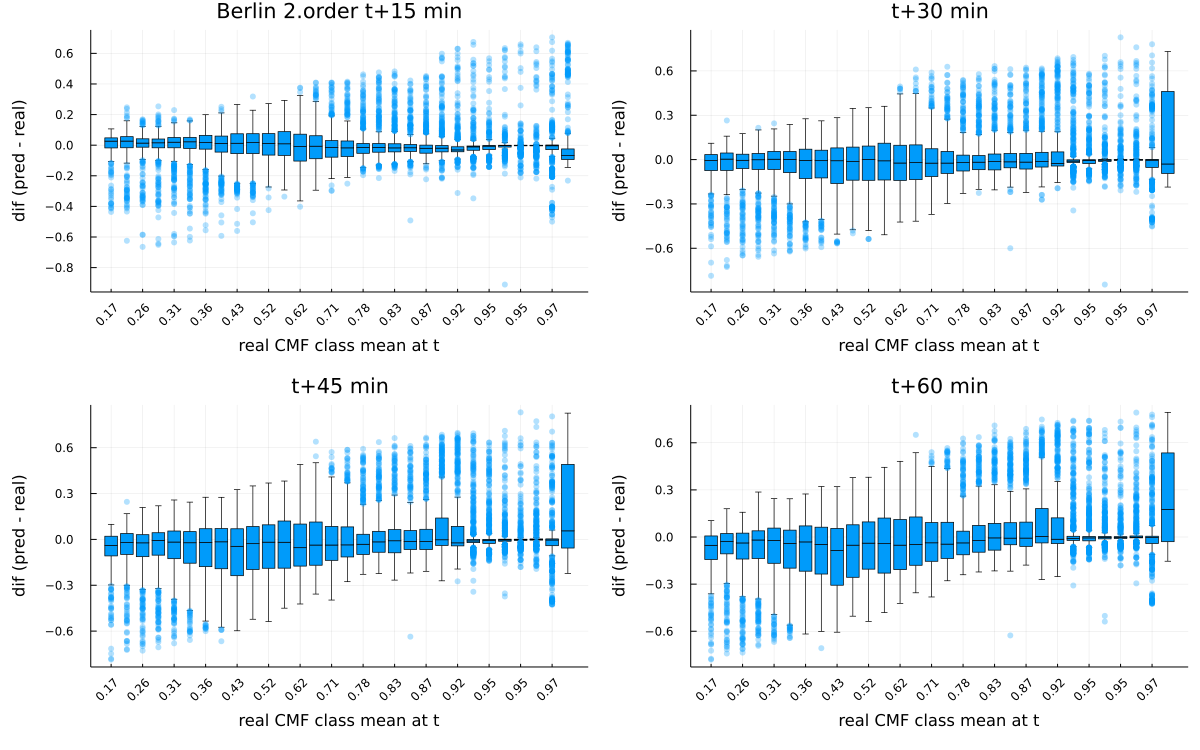

In [54]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

#### Corr with neighbor

In [8]:
fn_berlin_w  = "irradiation_Berlin_W.nc";

In [6]:
fn_berlin_sw = "irradiation_Berlin_SW.nc"
fn_berlin_s  = "irradiation_Berlin_S.nc"
fn_berlin_se = "irradiation_Berlin_SE.nc"
fn_berlin_e  = "irradiation_Berlin_E.nc"
fn_berlin_ne = "irradiation_Berlin_NE.nc"
fn_berlin_n  = "irradiation_Berlin_N.nc"
fn_berlin_nw = "irradiation_Berlin_NW.nc";

In [90]:
h_train_w = histogram(data_train_w, bins=binStarts_w, ylabel="Counts", title="Berlin W train (2004_02-2018_12)")

LoadError: UndefVarError: binStarts_w not defined

In [91]:
h_test_w = histogram(data_test_w, bins=binStarts_w, title="test W (2019)")

LoadError: UndefVarError: binStarts_w not defined

In [20]:
function getCMFraw(fn)
    fn_ = joinpath("data", fn)    
    ghi = getNCvar(fn_, "GHI")
    ghiCS = getNCvar(fn_, "CLEAR_SKY_GHI");
    cmf = ghi ./ ghiCS
    return cmf
end

getCMFraw (generic function with 1 method)

In [21]:
cmf_c = getCMFraw(fn_berlin);

In [23]:
cmf_w = getCMFraw(fn_berlin_w);

In [8]:
cmf_n = getCMFraw(fn_berlin_n)
cmf_e = getCMFraw(fn_berlin_e)
cmf_s = getCMFraw(fn_berlin_s)

cmf_sw = getCMFraw(fn_berlin_sw)
cmf_se = getCMFraw(fn_berlin_se)
cmf_ne = getCMFraw(fn_berlin_ne)
cmf_nw = getCMFraw(fn_berlin_nw)

558048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [15]:
function cor_neib(cmf_c, cmf_neib)
    df = DataFrame(:c => cmf_c[2:end], :neib => cmf_neib[1:end-1])
    filter!([:c, :neib] => (c, n) -> !isnan(c) && !isnan(n), df)
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [24]:
function cor_neib(cmf_c, cmf_neib; steps=1)
    df = DataFrame(:c => cmf_c[1+steps:end], :neib => cmf_neib[1:end-steps])
    filter!([:c, :neib] => (c, n) -> !isnan(c) && !isnan(n), df)
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [26]:
cor_w4 = cor_neib(cmf_c, cmf_w, steps=4)
cor_w3 = cor_neib(cmf_c, cmf_w, steps=3)
cor_w2 = cor_neib(cmf_c, cmf_w, steps=2)

In [24]:
cor_w = cor_neib(cmf_c, cmf_w)

0.7501867497056166

In [11]:
cor_n = cor_neib(cmf_c, cmf_n)
cor_e = cor_neib(cmf_c, cmf_e)
cor_s = cor_neib(cmf_c, cmf_s)

cor_sw = cor_neib(cmf_c, cmf_sw)
cor_se = cor_neib(cmf_c, cmf_se)
cor_ne = cor_neib(cmf_c, cmf_ne)
cor_nw = cor_neib(cmf_c, cmf_nw)

In [21]:
cor_mat = reshape([
    cor_sw, cor_s, cor_se,    
    cor_w,     1,  cor_e,
    cor_nw, cor_n, cor_ne
], 3, 3);

corMat = rd.(cor_mat, 3);

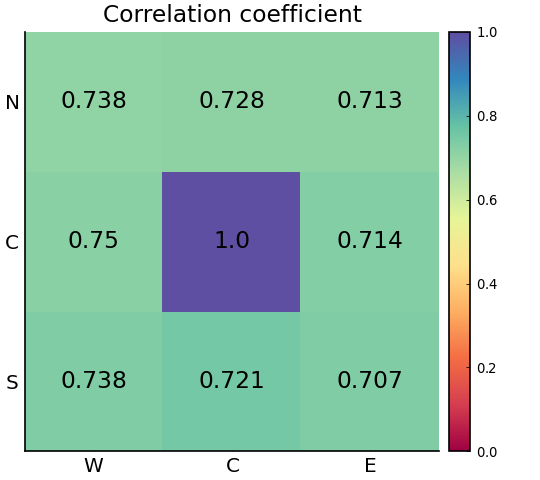

In [22]:
hm = heatmap(1:3, 1:3, cor_mat, c=palette(:Spectral_10), clim=(0,1), dpi=120, size=(450,400), title="Correlation coefficient",
    xticks=(1:3, ["W", "C", "E"]), yticks=(1:3, ["S", "C", "N"]), tickfontsize=12);
for i=1:3, j=1:3
    annotate!(i,j, corMat[i, j])
end
hm 

### neighbor CMF

In [9]:
test = getCMF0(fn_berlin; raw=1)[2];
test_neib_w = getCMF0(fn_berlin_w; raw=1)[2];

df21 = getDF(2, 1, N; test_neib=test_neib_w)
df22 = getDF(2, 2, N; test_neib=test_neib_w)

LoadError: UndefVarError: data_test_cls not defined

In [1]:
df23 = getDF(2, 3, N; test_neib=test_neib_w)
df24 = getDF(2, 4, N; test_neib=test_neib_w);

LoadError: UndefVarError: test_neib_w not defined

In [8]:
test_neib_sw = getCMF(fn_berlin_sw; raw=1)[2]
test_neib_nw = getCMF(fn_berlin_nw; raw=1)[2]
test_neib_s = getCMF(fn_berlin_s; raw=1)[2]
test_neib_se = getCMF(fn_berlin_se; raw=1)[2]
test_neib_ne = getCMF(fn_berlin_ne; raw=1)[2]

In [143]:
df22_s = getDF(2, 2, N; test_neib=test_neib_s)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64     Int64         Float64     Float64   Int64       Float64      Int64          
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.816105  0.435162         1         9   0.264479               8  0.437789         9   0.267107              8   0.645423   0.437789           9   0.267107                 8
     2 │ 0.142949  0.58129   0.269437         1         3   0.126488               2  0.263847         3   0.120898              2   0.438341   0.276249           4   0.1333                   3
     3 │ 0.151292  0.413393  0.170682         1         1   0.0193902              0  0.245249         3   0.0939568             2   0.262101   0.314274           5   0.162982                 4
     4 │ 0.240145  0.213271  0.142949         2         1  -0.0971964             -1  0.213818         2  -0.026327              0  -0.0268744  0.281747           4   0.0416014                2
     5 │ 0.227377  0.16343   0.151292         2         1  -0.0760845             -1  0.213818         2  -0.0135584             0  -0.063947   0.281747           4   0.05437                  2
     6 │ 0.182802  0.156667  0.240145         1         2   0.0573434              1  0.281747         4   0.0989448             3  -0.0261345  0.328775           6   0.145973                 5
     7 │ 0.18157   0.151836  0.227377         1         2   0.045807               1  0.246403         3   0.0648339             2  -0.0297338  0.296921           5   0.115352                 4
     8 │ 0.180078  0.118497  0.182802         1         1   0.00272383             0  0.219746         2   0.0396683             1  -0.0615806  0.281747           4   0.101669                 3
     9 │ 0.178091  0.104174  0.18157          1         1   0.00347838             0  0.213818         2   0.0357271             1  -0.0739175  0.281747           4   0.103655                 3
    10 │ 0.18459   0.13511   0.180078         1         1  -0.00451154             0  0.213818         2   0.0292287             1  -0.0494792  0.281747           4   0.0971571                3
    11 │ 0.279361  0.175311  0.178091         4         1  -0.10127               -3  0.213818         2  -0.0655429            -2  -0.10405    0.281747           4   0.00238554               0
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮          ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.23102   0.403451         7         8   0.0522252              1  0.411875         8   0.0606485             1  -0.120207   0.415747           9   0.0645211                2
 17968 │ 0.365446  0.253371  0.371119         7         7   0.00567275             0  0.380428         8   0.0149818             1  -0.112075   0.437017           9   0.0715711                2
 17969 │ 0.433149  0.269236  0.351226         9         7  -0.0819232             -2  0.386635         8  -0.0465147            -1  -0.163913   0.437017           9   0.00386798               0
 17970 │ 0.505302  0.315908  0.365446        11         7  -0.139856              -4  0.386635         8  -0.118667             -3  -0.189394   0.437017           9  -0.0682847               -2
 17971 │ 0.591621  0.380269  0.433149        12         9  -0.158472              -3  0.48402         10  -0.107601             -2  -0.211353   0.526605          11  -0.0650163               -1
 17972 │ 0.65306   0.463143  0.505302        14        11  -0.147758              -3  0.569766        12 

#### reliability

In [84]:
data_train_cls, binStarts, binMean = getBins(data_train, N; op="el")
data_test_cls = classify(data_test, binStarts);

In [58]:
data_train_cls, binStarts, binMean = getBins(data_train, 10) # city-specific
data_test_cls = classify(data_test, binStarts);

In [72]:
data_train_cls, binStarts, binMean = getBins(data_train, 20) # city-specific
data_test_cls = classify(data_test, binStarts);

In [59]:
df22_ = getDF(2, 2, 10)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64      Int64         Float64     Float64   Int64       Float64      Int64          
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.812441  0.435162         1         3   0.264479               2  0.423986         3   0.253304               2   0.641759   0.423986           3   0.253304                 2
     2 │ 0.142949  0.577954  0.269437         1         1   0.126488               0  0.304889         2   0.16194                1   0.435005   0.348972           3   0.206024                 2
     3 │ 0.151292  0.40955   0.170682         1         1   0.0193902              0  0.255325         1   0.104033               0   0.258258   0.255325           1   0.104033                 0
     4 │ 0.240145  0.188798  0.142949         1         1  -0.0971964              0  0.255325         1   0.0151802              0  -0.0513477  0.255325           1   0.0151802                0
     5 │ 0.227377  0.147695  0.151292         1         1  -0.0760845              0  0.255325         1   0.0279489              0  -0.0796814  0.255325           1   0.0279489                0
     6 │ 0.182802  0.13582   0.240145         1         1   0.0573434              0  0.255325         1   0.0725236              0  -0.0469821  0.255325           1   0.0725236                0
     7 │ 0.18157   0.144917  0.227377         1         1   0.045807               0  0.255325         1   0.0737559              0  -0.0366527  0.255325           1   0.0737559                0
     8 │ 0.180078  0.117192  0.182802         1         1   0.00272383             0  0.255325         1   0.0752474              0  -0.0628862  0.255325           1   0.0752474                0
     9 │ 0.178091  0.100783  0.18157          1         1   0.00347838             0  0.255325         1   0.0772343              0  -0.0773083  0.255325           1   0.0772343                0
    10 │ 0.18459   0.10863   0.180078         1         1  -0.00451154             0  0.255325         1   0.0707359              0  -0.0759591  0.255325           1   0.0707359                0
    11 │ 0.279361  0.114368  0.178091         2         1  -0.10127               -1  0.255325         1  -0.0240356             -1  -0.164993   0.255325           1  -0.0240356               -1
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.279701  0.403451         3         3   0.0522252              0  0.42237          3   0.0711434              0  -0.0715251  0.423986           3   0.0727598                0
 17968 │ 0.365446  0.271922  0.371119         3         3   0.00567275             0  0.423986         3   0.0585397              0  -0.093524   0.423986           3   0.0585397                0
 17969 │ 0.433149  0.29481   0.351226         3         3  -0.0819232              0  0.423986         3  -0.00916339             0  -0.138339   0.423986           3  -0.00916339               0
 17970 │ 0.505302  0.335291  0.365446         4         3  -0.139856              -1  0.423986         3  -0.0813161             -1  -0.170011   0.423986           3  -0.0813161               -1
 17971 │ 0.591621  0.393995  0.433149         4         3  -0.158472              -1  0.423986         3  -0.167635              -1  -0.197627   0.423986           3  -0.167635                -1
 17972 │ 0.65306   0.46773   0.505302         5         4  -0.147758              -1 

In [75]:
pred_mn = [mean(g.pred) for g in gb]

20-element Vector{Float64}:
 0.14084055614575133
 0.23249875022559488
 0.28201282023300206
 0.3217413116455796
 0.3660832413466893
 0.41900521758231246
 0.4902873336648194
 0.5575062973647888
 0.6316480865296256
 0.6976245665390056
 0.7491000426796237
 0.794887204472707
 0.8308882790136427
 0.8653985936281534
 0.8964601266934766
 0.9223060151922436
 0.9429164523099903
 0.9513919894226467
 0.9560118575740151
 0.972139231128456

In [76]:
len = length(gb)
rFs = zeros(len)
for i in 1:len
    g = gb[i]
    sdf = filter([:real_cls, :pred_cls] => (r, p) -> isequal(r, p), g)
    rFs[i] = size(sdf, 1) / size(g, 1)
end
rFs

20-element Vector{Float64}:
 0.3333333333333333
 0.22653721682847897
 0.20754716981132076
 0.19408740359897173
 0.16301969365426697
 0.1730612244897959
 0.1797884841363102
 0.1699530516431925
 0.16414435389988358
 0.14823261117445838
 0.17129977460555973
 0.20519713261648745
 0.14142049025769957
 0.1185929648241206
 0.06594773952716715
 0.0926517571884984
 0.5937961595273265
 0.5800524934383202
 0.6244444444444445
 1.0

In [77]:
mean(rFs)

0.2776553749499818

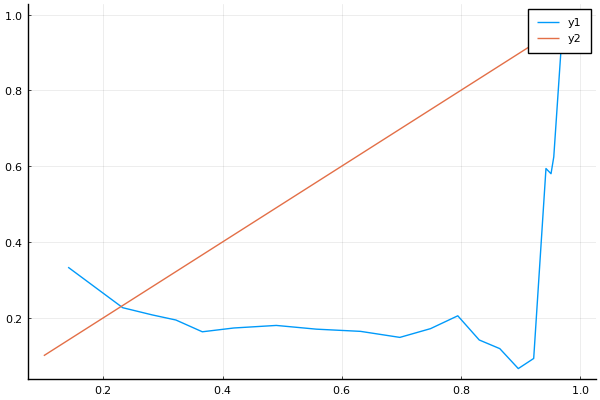

In [79]:
plot(pred_mn, rFs)
plot!(0.1:0.1:1, 0.1:0.1:1)

#### hist 
pers vs pred vs neib

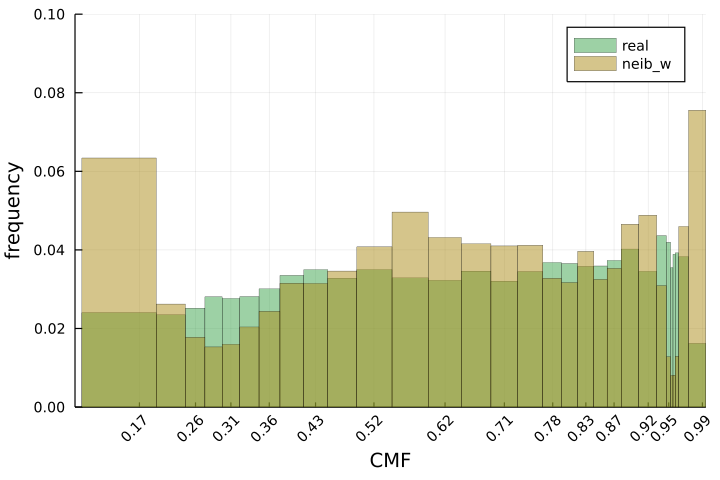

In [94]:
h1 = histogram(df21.real, normalize=:probability, bin=binStarts, label="real", 
    color=3, lw=0.2, fillalpha=0.5)
histogram!(df21.neib, normalize=:probability, bin=binStarts, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5,
    xlim=(0.08, 1), ylim=(0,0.1), xticks=xti, xrotation=45,
    xlabel="CMF", ylabel="frequency", dpi=:120)

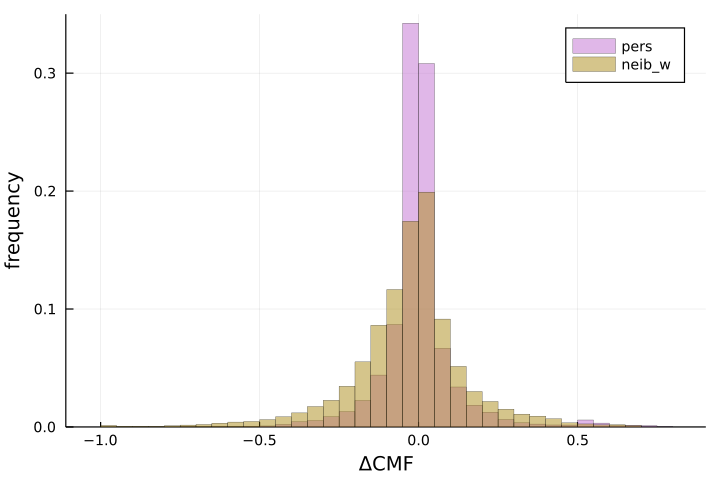

In [95]:
h2 = histogram(df21.dif_pers, normalize=:probability, bin=2N, label="pers",
    color=4, lw=0.2, fillalpha=0.5)
histogram!(df21.dif_neib, normalize=:probability, bin=2N, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5, dpi=:120,
    ylim=(0,0.35), xlabel="ΔCMF", ylabel="frequency") #title="$(od).order +$(15*step)min", )

#### mn ± sd 

In [97]:
df21_ = filter(:dif_neib => d -> !isnan(d), df21)
gb = groupby(df21_, :real_cls);

mns_real = [mean(g.real) for g in gb]
mns_pers = [mean(g.pers) for g in gb]
mns_pred = [mean(g.pred) for g in gb]
# mns_pred_n = [mean(g.pred_n) for g in gb]
mns_neib = [mean(g.neib) for g in gb]

sds_real = [std(g.real) for g in gb]
sds_pers = [std(g.pers) for g in gb]
sds_pred = [std(g.pred) for g in gb]
# sds_pred_n = [std(g.pred_n) for g in gb]
sds_neib = [std(g.neib) for g in gb];

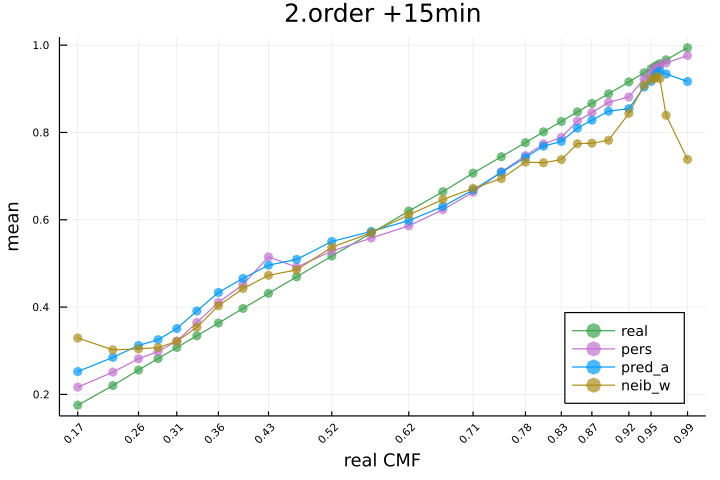

In [98]:
mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_neib], c=[3 4 1 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean", title="2.order +$(15*1)min",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

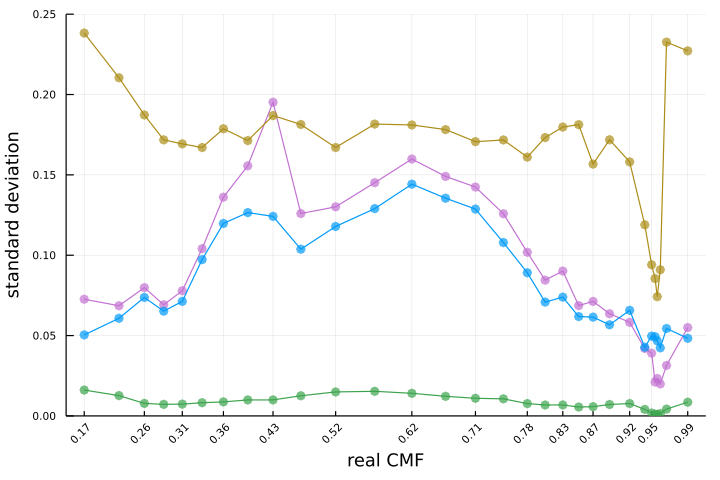

In [99]:
sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_neib], c=[3 4 1 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:none,
    ylim=(0,0.25), xlabel="real CMF", ylabel="standard deviation",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

##### +2 steps

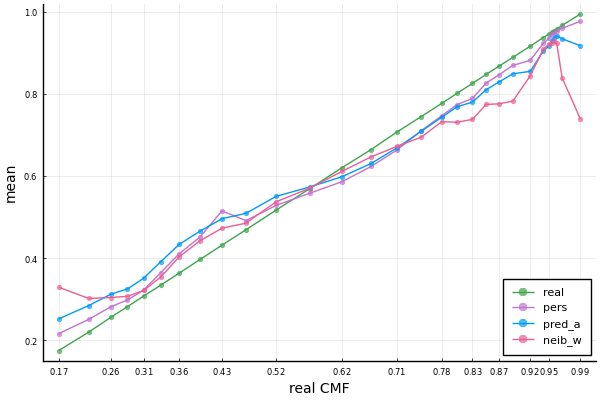

In [38]:
mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, fmt=:png) 

In [56]:
df22_ = filter(:dif_neib => d -> !isnan(d), df22)
gb = groupby(df22_, :real_cls);

In [56]:
mns_real = [mean(g.real) for g in gb]
mns_pers = [mean(g.pers) for g in gb]
mns_pred = [mean(g.pred) for g in gb]
mns_pred_n = [mean(g.pred_n) for g in gb]
mns_neib = [mean(g.neib) for g in gb]

sds_real = [std(g.real) for g in gb]
sds_pers = [std(g.pers) for g in gb]
sds_pred = [std(g.pred) for g in gb]
sds_pred_n = [std(g.pred_n) for g in gb]
sds_neib = [std(g.neib) for g in gb]

30-element Vector{Float64}:
 0.2382389451652898
 0.21043680757690042
 0.1868641544553895
 0.1717877680957454
 0.16930096936123706
 0.16701947563402963
 0.1787057592625797
 0.17134496413860295
 0.1869079705222032
 0.18135092770815034
 0.16702425653136502
 0.1816100455696755
 0.18107176470598046
 ⋮
 0.17976631405221066
 0.1812544552354521
 0.15671755141095242
 0.17184452655657312
 0.1580945899620175
 0.11891380240566378
 0.09407108575113027
 0.08548404376538654
 0.0741958946966832
 0.0909889409272269
 0.23260452002956006
 0.22715960251729847

In [70]:
mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n, mns_neib], c=[3 4 1 7 5],
    marker=(3, 0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean", title="+30 min",
    xticks=xti, xrotation=45, tickfontsize=7, labelfontsize=10) 

sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n, sds_neib], c=[3 4 1 7 5],
    marker=(3, 0.7, :o, stroke(0)), leg=:none,
    xlabel="real CMF", ylabel="standard deviation", title="+30 min",
    xticks=xti, xrotation=45, tickfontsize=7, labelfontsize=10) 

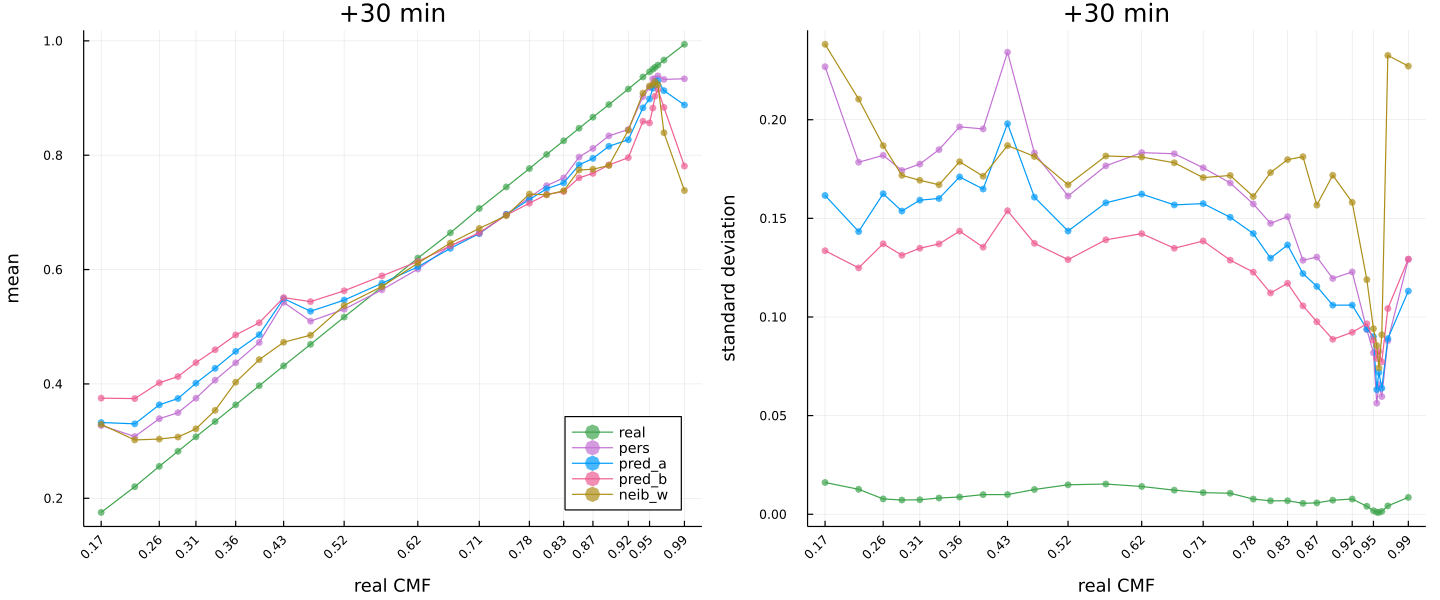

In [69]:
p = plot(mns, sds, leftmargin=20px, bottommargin=20px, size=(1200, 500))

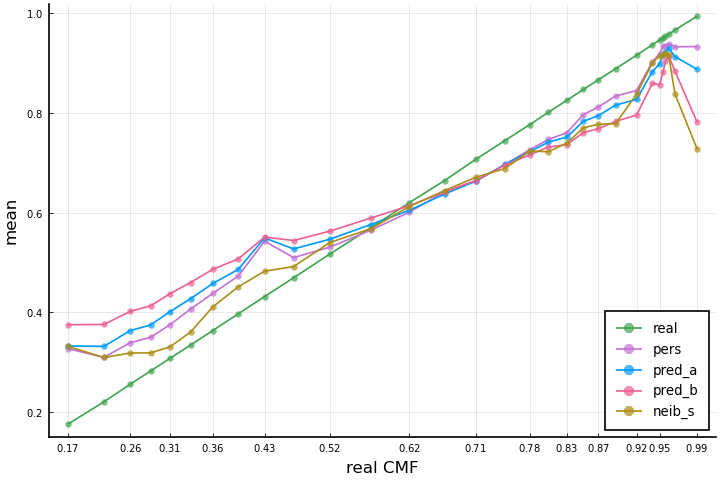

In [147]:
mns_s = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n, mns_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean", title="+30 min",
    xticks=xti, xrotation=45) #, tickfontsize=6, labelfontsize=10, dpi=:120) 

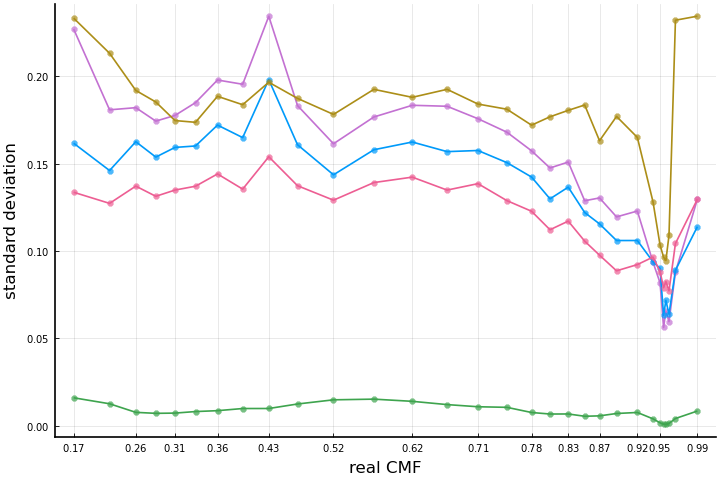

In [148]:
sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n, sds_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:none,
    xlabel="real CMF", ylabel="standard deviation",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

#### errors

In [100]:
function viz_err(df, binMean, xti; tit="2. order +$(15*2) min", err="mae")
    gb = groupby(df, :real_cls)
    if err == "mae"
        ylab = "mean absolute error"
        tit = tit
        ylim = 0.3
        err_pred = [meanad(g.pred, g.real) for g in gb]
        err_pers = [meanad(g.pers, g.real) for g in gb]
#         err_pred_n = [meanad(g.pred_n, g.real) for g in gb]
        err_neib = [meanad(g.neib, g.real) for g in gb]
    elseif err == "rmse"
        ylab = "root mean square error"
        tit = ""
        ylim = 0.4
        err_pred = [rmsd(g.pred, g.real) for g in gb]
        err_pers = [rmsd(g.pers, g.real) for g in gb]
#         err_pred_n = [rmsd(g.pred_n, g.real) for g in gb]
        err_neib = [rmsd(g.neib, g.real) for g in gb]
    end   
    (df == df21_ && err == "mae") ? leg1=:topleft : leg1 = :none
    if df == df21_ 
        errs = [err_pers, err_pred, err_neib]
        clrs = [4 1 5]
        labs = ["pers" "pred_a" "neib_s"]
    else
        errs = [err_pers, err_pred, err_pred_n, err_neib]
        clrs = [4 1 7 5]
        labs = ["pers" "pred_a" "pred_b" "neib_s"]
    end        
    p = plot(binMean, errs, c=clrs, marker=(0.7, stroke(0)), dpi=:120,
        leg=leg1, label=labs,
        xticks=xti, xrotation=45, ylim=(0,ylim), tickfontsize=5,
        xlabel="real CMF", ylabel=ylab, title=tit)
    return p
end

viz_err (generic function with 1 method)

In [102]:
mae = viz_err(df21_, binMean, xti; tit="", err="mae")
rmse = viz_err(df21_, binMean, xti; tit="2. order +$(15*1) min", err="rmse")

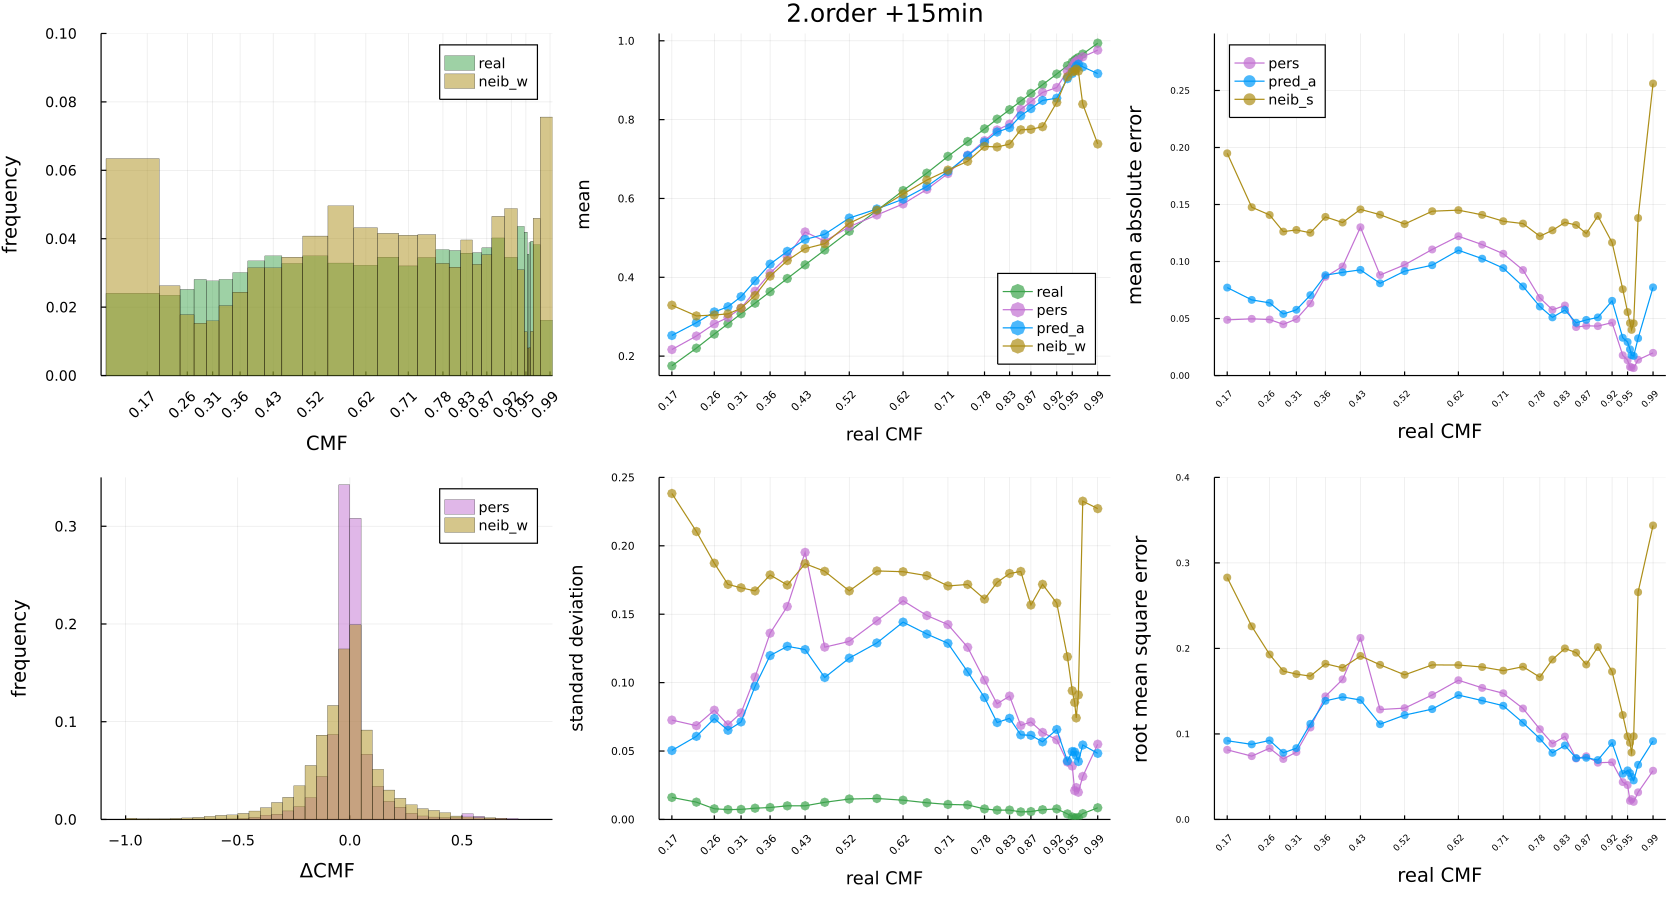

In [103]:
p = plot(h1, mns, mae, h2, sds, rmse, layout=@layout([a b c; d e f]), size=(1400, 750), fmt=:png,
        left_margin=20px, bottom_margin=20px)

##### +2 steps

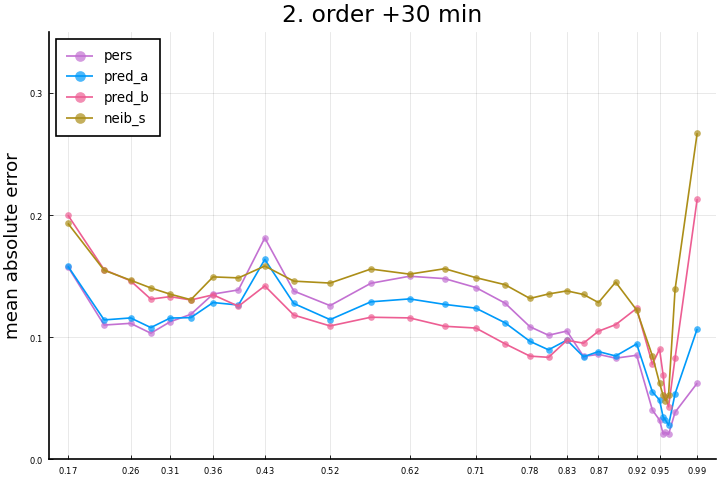

In [160]:
mae = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="mae")

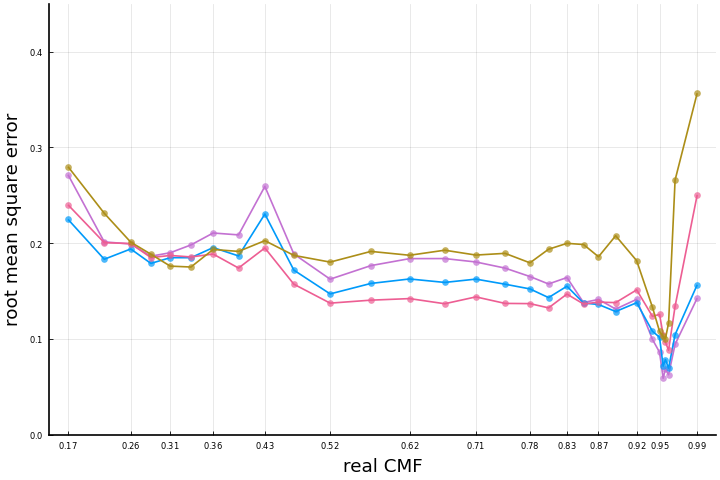

In [161]:
rmse = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="rmse")

#### Bias

In [82]:
dff = df22[:, [:dif_pers, :dif_pred, :dif_pred_n, :dif_neib, :dif_hyb_m, :dif_hyb_r]]

8816×6 DataFrame
  Row │ dif_pers     dif_pred     dif_pred_n   dif_neib    dif_hyb_m    dif_hyb_r   
      │ Float64      Float64      Float64      Float64     Float64      Float64     
──────┼─────────────────────────────────────────────────────────────────────────────
    1 │  0.126488     0.120898     0.1333       0.435005    0.1333       0.1333
    2 │ -0.0971964   -0.026327     0.0416014   -0.0513477  -0.026327    -0.026327
    3 │  0.0573434    0.0989448    0.145973    -0.0469821   0.0989448    0.0989448
    4 │  0.00272383   0.0396683    0.101669    -0.0628862   0.0396683    0.0396683
    5 │ -0.00451154   0.0292287    0.0971571   -0.0759591   0.0292287    0.0292287
    6 │ -0.088423    -0.0591943    0.00873407  -0.0902705  -0.0591943   -0.0591943
    7 │ -0.0903167   -0.0637855   -0.0110659   -0.0689947  -0.0903167   -0.0689947
    8 │ -0.0281014    0.0214925    0.0455867    0.0623953   0.0214925    0.0455867
    9 │ -0.170942    -0.146626    -0.0886402   -0.0852479  -0.0886402   -0.0852479
   10 │ -0.228686    -0.192829    -0.148801    -0.210613   -0.148801    -0.148801
   11 │  0.350442     0.355512     0.355711     0.0919952   0.355711     0.355711
  ⋮   │      ⋮            ⋮            ⋮           ⋮            ⋮            ⋮
 8807 │ -0.164386    -0.117918    -0.082036    -0.266349   -0.082036    -0.082036
 8808 │  0.0330548    0.030065     0.0235049   -0.157679    0.0235049    0.0235049
 8809 │ -0.0340642   -0.0219492   -0.0105593   -0.276306   -0.0105593   -0.0105593
 8810 │  0.219517     0.208958     0.208958    -0.109714    0.208958     0.208958
 8811 │  0.134667     0.135562     0.164262    -0.0633513   0.164262     0.164262
 8812 │  0.00567275   0.0149818    0.0715711   -0.093524    0.0149818    0.0715711
 8813 │ -0.139856    -0.118667    -0.0682847   -0.170011   -0.118667    -0.0682847
 8814 │ -0.147758    -0.0832934   -0.0548304   -0.18533    -0.0548304   -0.0548304
 8815 │ -0.0609222   -0.0209103    0.00732246  -0.0898753   0.00732246   0.00732246
 8816 │ -0.202986    -0.202224    -0.202224    -0.278043   -0.202224    -0.202224
                                                                   8795 rows omitted

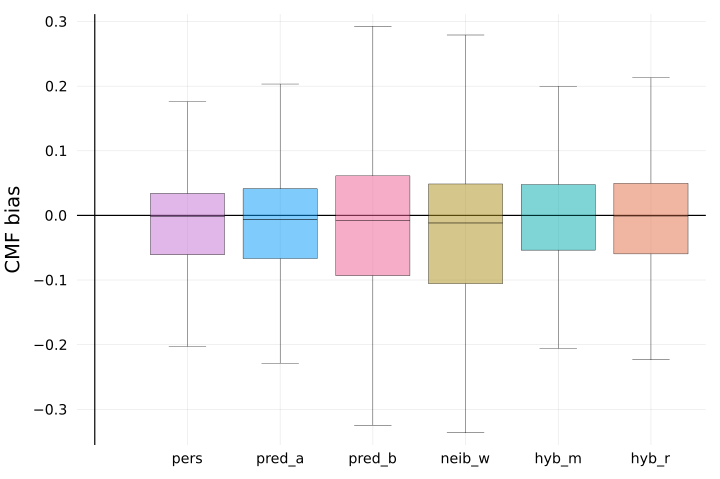

In [87]:
lab = ["pers", "pred_a", "pred_b", "neib_w", "hyb_m", "hyb_r"]
b = boxplot(Array(dff), leg=:none, frame=:zerolines, outliers=false, 
        c=[4 1 7 5 6 2], label=lab, xticks=(1:size(dff, 2), lab),
        fillalpha=0.5, lw=0.3, 
        ylabel="CMF bias") #, title=city)

###  Hybrid

In [55]:
    df.dif_cmf = -df.dif_pers
    max_dif = floor(maximum(df.dif_cmf); digits=1)
    min_dif = floor(minimum(df.dif_cmf); digits=1)    
    difBinStarts = collect(min_dif:0.1:max_dif)
    df.cls_dif_cmf = classify(df.dif_cmf, difBinStarts)
#     df = filter(:dif_neib => d -> !isnan(d), df)    
    gb = groupby(df, :cls_dif_cmf)
    bin_mn = [mean(g.dif_cmf) for g in gb]
    mae_pers = [meanad(g.pers, g.real) for g in gb]
    mae_pred = [meanad(g.pred, g.real) for g in gb]
    mae_pred_b = [meanad(g.pred_n, g.real) for g in gb]

18-element Vector{Float64}:
 0.45342248854503353
 0.4853358445763735
 0.49269158332082513
 0.39634523906203395
 0.3991438258899884
 0.2941278985393849
 0.22637404715251838
 0.14358547446895137
 0.07075431800348274
 0.06274908797023827
 0.11083374294886458
 0.19769514807381153
 0.2914333876086483
 0.37477807366304183
 0.4575995874455242
 0.5291949315905745
 0.6135876547326695
 0.7182533854672035

In [50]:
    rmse_pers = [rmsd(g.pers, g.real) for g in gb]
    rmse_pred = [rmsd(g.pred, g.real) for g in gb]
    rmse_pred_b = [rmsd(g.pred_n, g.real) for g in gb]

In [76]:
df.mae_min = Int64[0; mae_min[df.cls_dif_cmf[2:end]]]

17976-element Vector{Int64}:
 0
 2
 1
 1
 1
 1
 1
 1
 1
 1
 3
 1
 1
 ⋮
 3
 2
 1
 1
 1
 3
 3
 3
 3
 1
 3
 3

In [77]:
        df.hyb = map(eachrow(df)) do r
            if r.mae_min == 1
                r.pers
            elseif r.mae_min == 2
                r.pred
            else #if r.mae_min == 3
                r.pred_n
            end
        end

17976-element Vector{Float64}:
 0.43778912158761335
 0.2638470793726645
 0.17068227409802456
 0.1429488917122064
 0.15129203466407165
 0.2401452489621812
 0.22737657362189478
 0.18280183122008878
 0.18156954657218516
 0.18007800118079556
 0.28174661453279654
 0.18458954524943652
 0.27936107032897006
 ⋮
 0.6714959511397683
 0.506680959398359
 0.403451396683371
 0.37111900127524317
 0.3512261624529648
 0.4370173352974199
 0.526605046603625
 0.5982291483347111
 0.6422579398288176
 0.653059553669952
 0.714744071125275
 0.714744071125275

In [83]:
df22

17976×16 DataFrame
   Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n  dif_cmf      cls_dif_cmf 
       │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64     Int64         Float64   Int64       Float64      Int64           Float64      Int64       
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682         1  0.435162         9   0.264479               8  0.437789         9   0.267107              8  0.437789           9   0.267107                 8  -0.264479              7
     2 │ 0.142949         1  0.269437         3   0.126488               2  0.263847         3   0.120898              2  0.276249           4   0.1333                   3  -0.126488              8
     3 │ 0.151292         1  0.170682         1   0.0193902              0  0.245249         3   0.0939568             2  0.314274           5   0.162982                 4  -0.0193902             9
     4 │ 0.240145         2  0.142949         1  -0.0971964             -1  0.213818         2  -0.026327              0  0.281747           4   0.0416014                2   0.0971964            10
     5 │ 0.227377         2  0.151292         1  -0.0760845             -1  0.213818         2  -0.0135584             0  0.281747           4   0.05437                  2   0.0760845            10
     6 │ 0.182802         1  0.240145         2   0.0573434              1  0.281747         4   0.0989448             3  0.328775           6   0.145973                 5  -0.0573434             9
     7 │ 0.18157          1  0.227377         2   0.045807               1  0.246403         3   0.0648339             2  0.296921           5   0.115352                 4  -0.045807              9
     8 │ 0.180078         1  0.182802         1   0.00272383             0  0.219746         2   0.0396683             1  0.281747           4   0.101669                 3  -0.00272383            9
     9 │ 0.178091         1  0.18157          1   0.00347838             0  0.213818         2   0.0357271             1  0.281747           4   0.103655                 3  -0.00347838            9
    10 │ 0.18459          1  0.180078         1  -0.00451154             0  0.213818         2   0.0292287             1  0.281747           4   0.0971571                3   0.00451154           10
    11 │ 0.279361         4  0.178091         1  -0.10127               -3  0.213818         2  -0.0655429            -2  0.281747           4   0.00238554               0   0.10127              11
   ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮          ⋮            ⋮           ⋮          ⋮            ⋮             ⋮              ⋮            ⋮
 17967 │ 0.351226         7  0.403451         8   0.0522252              1  0.411875         8   0.0606485             1  0.415747           9   0.0645211                2  -0.0522252             9
 17968 │ 0.365446         7  0.371119         7   0.00567275             0  0.380428         8   0.0149818             1  0.437017           9   0.0715711                2  -0.00567275            9
 17969 │ 0.433149         9  0.351226         7  -0.0819232             -2  0.386635         8  -0.0465147            -1  0.437017           9   0.00386798               0   0.0819232            10
 17970 │ 0.505302        11  0.365446         7  -0.139856              -4  0.386635         8  -0.118667             -3  0.437017           9  -0.0682847               -2   0.139856             11
 17971 │ 0.591621        12  0.433149         9  -0.158472              -3  0.48402         10  -0.107601             -2  0.526605          11  -0.0650163               -1   0.158472             11
 17972 │ 0.65306       

In [79]:
meanad(df.pers, df.real)

0.10116199511272278

#### rmse vs mae

In [16]:
function getMae(df, steps)
    mae_pers = meanad(df.pers, df.real)
    mae_pred = meanad(df.pred, df.real)
    if steps == 1
        return mae_pers, mae_pred 
    else
        mae_pred_n = meanad(df.pred_n, df.real)
        df_ = filter(:dif_neib => d -> !isnan(d), copy(df))
        mae_neib = meanad(df_.neib, df_.real)
        return mae_pers, mae_pred, mae_pred_n, mae_neib
    end
end

getMae (generic function with 1 method)

In [17]:
function getRmse(df, steps)
    rmse_pers = rmsd(df.pers, df.real)
    rmse_pred = rmsd(df.pred, df.real)
    if steps == 1
        return rmse_pers, rmse_pred 
    else
        rmse_pred_n = rmsd(df.pred_n, df.real)
        df_ = filter(:dif_neib => d -> !isnan(d), copy(df))
        rmse_neib = rmsd(df_.neib, df_.real)
        return rmse_pers, rmse_pred, rmse_pred_n, rmse_neib
    end
end

getRmse (generic function with 1 method)

In [18]:
maes_pers = [getMae(df21, 1)[1], getMae(df22, 2)[1], getMae(df23, 3)[1], getMae(df24, 4)[1]]
rmses_pers = [getRmse(df21, 1)[1], getRmse(df22, 2)[1], getRmse(df23, 3)[1], getRmse(df24, 4)[1]]

maes_pred = [getMae(df21, 1)[2], getMae(df22, 2)[2], getMae(df23, 3)[2], getMae(df24, 4)[2]]
rmses_pred = [getRmse(df21, 1)[2], getRmse(df22, 2)[2], getRmse(df23, 3)[2], getRmse(df24, 4)[2]]

maes_pred_n = [getMae(df22, 2)[3], getMae(df23, 3)[3], getMae(df24, 4)[3]]
rmses_pred_n = [getRmse(df22, 2)[3], getRmse(df23, 3)[3], getRmse(df24, 4)[3]];

In [35]:
maes_neib = [getMae(df22, 2)[4], getMae(df23, 3)[4], getMae(df24, 4)[4]]
rmses_neib = [getRmse(df22, 2)[4], getRmse(df23, 3)[4], getRmse(df24, 4)[4]]

3-element Vector{Float64}:
 0.18466899334609768
 0.18461097388856912
 0.18458713779011177

In [70]:
p2 = plot([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], label=["pers" "pred_a" "hybr_m" "hybr_r"], leg=:topleft,
    xlim=(0,0.22), ylim=(0,0.22),
    xlabel="MAE", ylabel="RMSE", title="Berlin 2.order")
plot!([maes_pred_n], [rmses_pred_n], c=[7 2 9], label="pred_b", marker=(0.7, stroke(0)), size=(670, 650), dpi=:120, fmt=:png)

annotate!(0.06, 0.095, text("+15 min", 8))
annotate!(0.11, 0.145, text("+$(15*2) min", 8))
# annotate!(0.1, 0.2, text("+$(15*3) min", 8))
annotate!(0.155, 0.21, text("+$(15*4) min", 8));

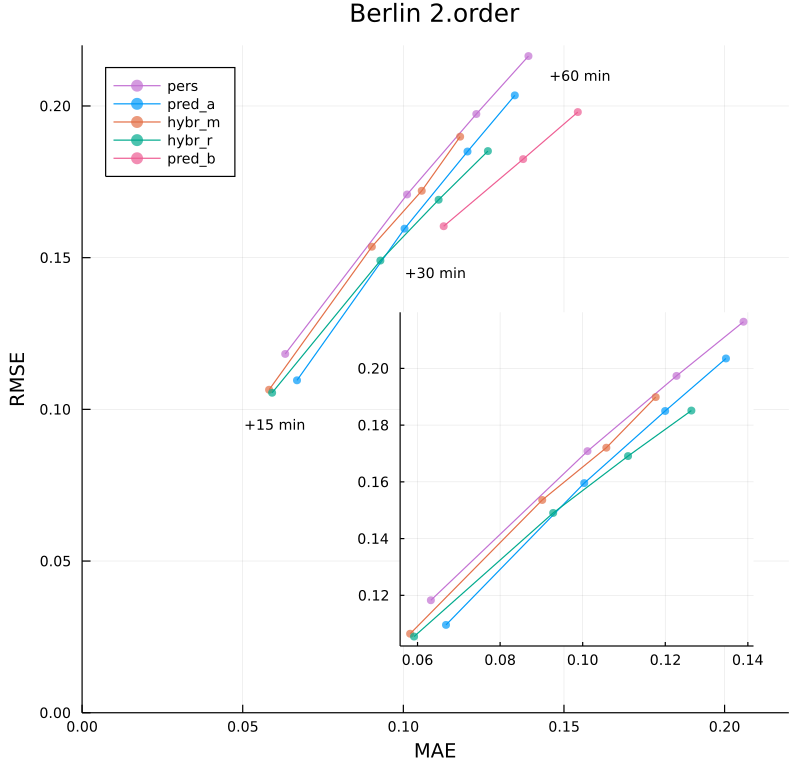

In [71]:
bb = bbox(0.45, 0.4, 0.5, 0.5)
plot!([maes_pers maes_pred maes_hyb maes_hyb_r], [rmses_pers rmses_pred rmses_hyb rmses_hyb_r], marker=(0.7, stroke(0)), 
    c=[4 1 2 9], leg=:none, inset=(1, bb), subplot=2)
# plot!(maes_pred_n, rmses_pred_n, c=7, marker=(0.7, stroke(0)), inset=(1, bb)) #, subplot=2)

In [16]:
    df1 = df21[:, [:real, :pers, :pred, :hyb_m, :hyb_r]] 
    df2 = df22[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]
    df3 = df23[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]
    df4 = df24[:, [:real, :pers, :pred, :pred_n, :hyb_m, :hyb_r]]

8815×6 DataFrame
  Row │ real      pers      pred      pred_n    hyb_m     hyb_r    
      │ Float64   Float64   Float64   Float64   Float64   Float64  
──────┼────────────────────────────────────────────────────────────
    1 │ 0.240145  0.269437  0.263847  0.375359  0.269437  0.269437
    2 │ 0.182802  0.142949  0.213818  0.375359  0.13582   0.13582
    3 │ 0.180078  0.240145  0.281747  0.407598  0.117192  0.117192
    4 │ 0.18459   0.182802  0.219746  0.375359  0.10863   0.10863
    5 │ 0.273013  0.180078  0.213818  0.375359  0.182742  0.182742
    6 │ 0.363329  0.18459   0.213818  0.375359  0.294335  0.294335
    7 │ 0.391431  0.273013  0.299544  0.437017  0.299544  0.453826
    8 │ 0.562373  0.363329  0.412923  0.526605  0.477125  0.477125
    9 │ 0.791058  0.391431  0.415747  0.558272  0.558272  0.558272
   10 │ 0.440617  0.562373  0.598229  0.625106  0.625106  0.625106
   11 │ 0.454868  0.791058  0.796128  0.796327  0.321758  0.321758
  ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮         ⋮
 8806 │ 0.724294  0.483225  0.489636  0.490408  0.490408  0.490408
 8807 │ 0.691239  0.559908  0.606376  0.625106  0.625106  0.625106
 8808 │ 0.725303  0.724294  0.721304  0.714744  0.714744  0.714744
 8809 │ 0.505786  0.691239  0.703354  0.714744  0.714744  0.714744
 8810 │ 0.371119  0.725303  0.714744  0.714744  0.714744  0.714744
 8811 │ 0.365446  0.505786  0.506681  0.535381  0.506681  0.271922
 8812 │ 0.505302  0.371119  0.380428  0.526605  0.380428  0.335291
 8813 │ 0.65306   0.365446  0.386635  0.526605  0.526605  0.526605
 8814 │ 0.713982  0.505302  0.569766  0.625106  0.625106  0.625106
 8815 │ 0.916968  0.65306   0.693071  0.714744  0.714744  0.714744
                                                  8794 rows omitted

In [18]:
    len = size(df2, 2)
    lab = ["pers", "pred_a", "pred_b", "hyb_m", "hyb_r"];

In [19]:
    df_err = DataFrame(:method => lab)
    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:(len-1)]
    insert!(mae1, 3, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:(len-1)]
    insert!(rmse1, 3, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 

    @show df_err;

df_err = 5×9 DataFrame
 Row │ method  mae1         mae2       mae3      mae4      rmse1        rmse2     rmse3     rmse4
     │ String  Float64      Float64    Float64   Float64   Float64      Float64   Float64   Float64
─────┼───────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0570523  0.0960821  0.118718  0.135121    0.100768   0.161038  0.191001  0.210746
   2 │ pred_a    0.0617175  0.0962775  0.11697   0.131706    0.0960198  0.152192  0.180502  0.199158
   3 │ pred_b  NaN          0.108831   0.134506  0.150909  NaN          0.154475  0.179031  0.194168
   4 │ hyb_m     0.0571481  0.0959762  0.115995  0.122906    0.0996984  0.158297  0.182077  0.184927
   5 │ hyb_r     0.0575462  0.0982273  0.118573  0.125093    0.0992689  0.158989  0.182735  0.184299


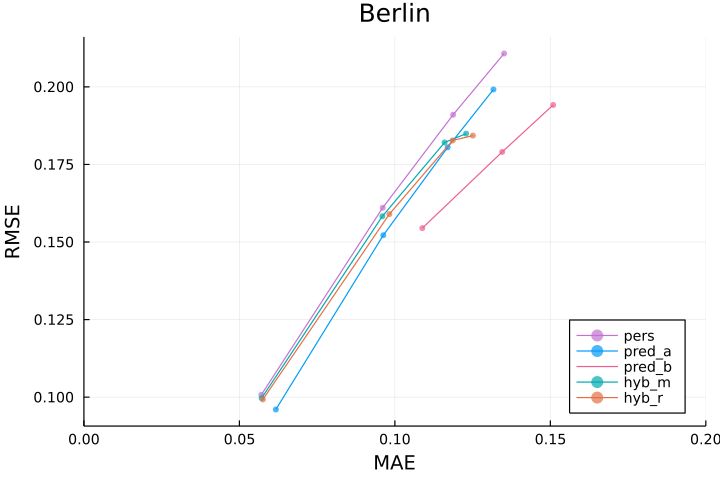

In [21]:
    p = plot(leg=:bottomright, xlim=(0,0.2), aspect_ratio=1, #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title="Berlin")
    clrs = [4, 1, 7, 6, 2]
    for i in 1:(len-1)
    plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(3, 0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
p

In [31]:
    return p
end

viz_err_city (generic function with 1 method)

In [31]:
function viz_err_city(fn)
    city = split(fn, ['_', '.'])[2] 
    df21 = get_df_city(fn, 1; hyb=1)
    df1 = df21[:,[1, 3, 7, 12, 14]]

    df22 = get_df_city(fn, 2; hyb=1)
    df2 = df22[:,[1, 3, 7, 11, 16, 18]]

    df23 = get_df_city(fn, 3; hyb=1)
    df3 = df23[:,[1, 3, 7, 11, 16, 18]]

    df24 = get_df_city(fn, 4; hyb=1)
    df4 = df24[:,[1, 3, 7, 11, 16, 18]]

    len = size(df2, 2)
    lab = names(df2)[2:end]

    df_err = DataFrame(:method => lab)
    mae1 = [meanad(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(mae1, 3, NaN)
    df_err.mae1 = mae1
    df_err.mae2 = [meanad(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.mae3 = [meanad(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.mae4 = [meanad(df4[:,1], df4[:,i]) for i in 2:len]   

    rmse1 = [rmsd(df1[:,1], df1[:,i]) for i in 2:5]
    insert!(rmse1, 3, NaN)
    df_err.rmse1 = rmse1
    df_err.rmse2 = [rmsd(df2[:,1], df2[:,i]) for i in 2:len]   
    df_err.rmse3 = [rmsd(df3[:,1], df3[:,i]) for i in 2:len]   
    df_err.rmse4 = [rmsd(df4[:,1], df4[:,i]) for i in 2:len] 
    @show df_err;
    p = plot(leg=:bottomright, xlim=(0,0.2), #ylim=(0,0.25), 
        xlabel="MAE", ylabel="RMSE", title=city)
    clrs = [4, 1, 7, 5, 6]
    for i in 1:5
        plot!(Array(df_err[i,2:5]), Array(df_err[i,6:end]), marker=(0.7, stroke(0)), c=clrs[i], label=lab[i])
    end
    return p
end

viz_err_city (generic function with 1 method)

#### bias range

In [90]:
gb = groupby(df22, :real_cls)
bias_pers = [mean(g.dif_pers) for g in gb]

bias_pred = [mean(g.dif_pred) for g in gb]

bias_pred_n = [mean(g.dif_pred_n) for g in gb]

In [99]:
bias_neib = [mean(g.dif_neib) for g in gb]
bias_hyb_m = [mean(g.dif_hyb_m) for g in gb]
bias_hyb_r = [mean(g.dif_hyb_r) for g in gb]

30-element Vector{Float64}:
  0.19234558095517376
  0.11354738683526763
  0.09125280844054207
  0.0721127265629833
  0.06989082224898287
  0.06684556015010187
  0.12490102945189371
  0.10521163319721262
  0.13908648801611878
  0.07557544131186787
  0.05975496178035948
  0.03588602117785405
  0.021946814768029028
  ⋮
 -0.06224731979632716
 -0.058309570675737554
 -0.06118293103590216
 -0.06901214978450727
 -0.07445282385100462
 -0.027271363688607265
 -0.027360193394143147
 -0.017789153669880656
 -0.019796684818411816
 -0.019394315199554885
 -0.036932277007270885
 -0.05551812129982795

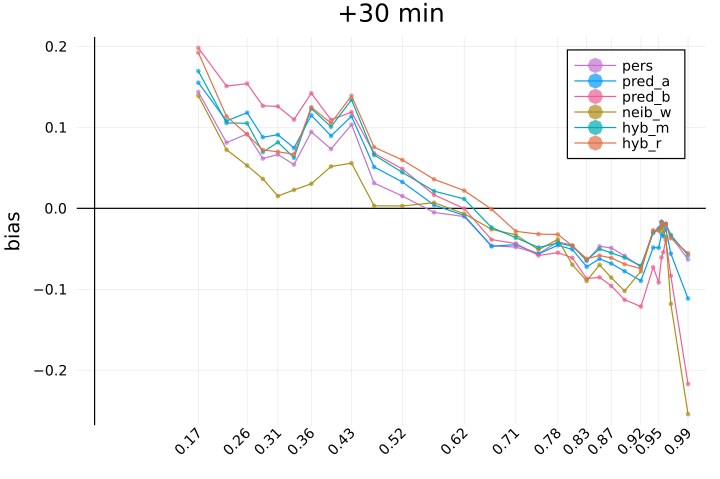

In [103]:
v = plot(binMean, [bias_pers bias_pred bias_pred_n bias_neib bias_hyb_m bias_hyb_r], frame=:zerolines, 
        label=["pers" "pred_a" "pred_b" "neib_w" "hyb_m" "hyb_r"], c=[4 1 7 5 6 2], marker=(2, 0.7, :o, stroke(0)),  
        xticks=xti, xrotation=45, 
        ylabel="bias", title="+30 min")